In [ ]:
import pandas as pd

# Membaca data tagihan air
df_tagihan_air = pd.read_csv('/content/tagihan_air_bersih1.csv', sep=';')
print(df_tagihan_air.head(5))

# Membaca data transaksi listrik
df_listrik = pd.read_csv('/content/transaksi_listrik_bersih.csv', sep=';')
print(df_listrik.head(5))

# Membaca data pembayaran air
df_pembayaran_air = pd.read_csv('/content/pembayaran_air_lengkap_bersih2.csv', sep=';')
print(df_pembayaran_air.head(5))

# Membaca data master unit
df_master_unit = pd.read_csv('/content/master_unit_bersih.csv', sep=';')
print(df_master_unit.head(5))

# Membaca data invoice air
df_invoice_air = pd.read_csv('/content/invoice_air.csv', sep=';')
print(df_invoice_air.head(5))

# Membaca data unit pemilik
df_unit_pemilik = pd.read_csv('/content/unit_pemilik3.csv', sep=';')
print(df_unit_pemilik.head(5))

     contract_id Business Name Unit Code  Start    end  qty   tarif  \
0  TJC/2301/0143         A0101  TA/01/01    827  831.0    4   67400   
1  TJC/2301/2165         C1708  TC/17/08    327  334.0    7  105200   
2  TJC/2301/2167         C1709  TC/17/09     87   87.0    0   17000   
3  TJC/2301/2168         C1710  TC/17/10    221  223.0    2   42200   
4  TJC/2301/2169         C1711  TC/17/11    193  193.0    0   17000   

         thbl  
0  2023-04-01  
1  2023-04-01  
2  2023-04-01  
3  2023-04-01  
4  2023-04-01  
       cb_in_id     tanggal  amount_in   keterangan posted_date   unit
0  VI-2401-0003  2024-01-23      50000  TOKEN A1225  2024-01-23  A1225
1  VI-2401-0004  2024-01-23      50000  TOKEN A0302  2024-01-23  A0302
2  VI-2401-0005  2024-01-23     150000  TOKEN A0308  2024-01-23  A0308
3  VI-2401-0006  2024-01-23      50000  TOKEN C0316  2024-01-23  C0316
4  VI-2401-0007  2024-01-23      50000  TOKEN A0520  2024-01-23  A0520
              Payment_Id Payment_Date Posting_Date 

## Aslinya

=== OVERVIEW DATASET ===
Tagihan Air: (32840, 8)
Transaksi Listrik: (1356, 6)
Pembayaran Air: (67173, 17)
Master Unit: (2474, 6)
Invoice Air: (17446, 12)
Unit Pemilik: (2380, 4)

=== ANALISIS PENGGUNAAN AIR ===

Statistik Penggunaan Air (qty):
count    32840.000000
mean         4.408800
std         27.964776
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max       4545.000000
Name: qty, dtype: float64

Jumlah anomali penggunaan air: 962 dari 32840 data

=== ANALISIS TRANSAKSI LISTRIK ===

Statistik Transaksi Listrik (amount_in):
count      1356.000000
mean      91015.629794
std       79332.726345
min       50000.000000
25%       50000.000000
50%       50000.000000
75%      100000.000000
max      500000.000000
Name: amount_in, dtype: float64

Jumlah anomali transaksi listrik: 126 dari 1356 data


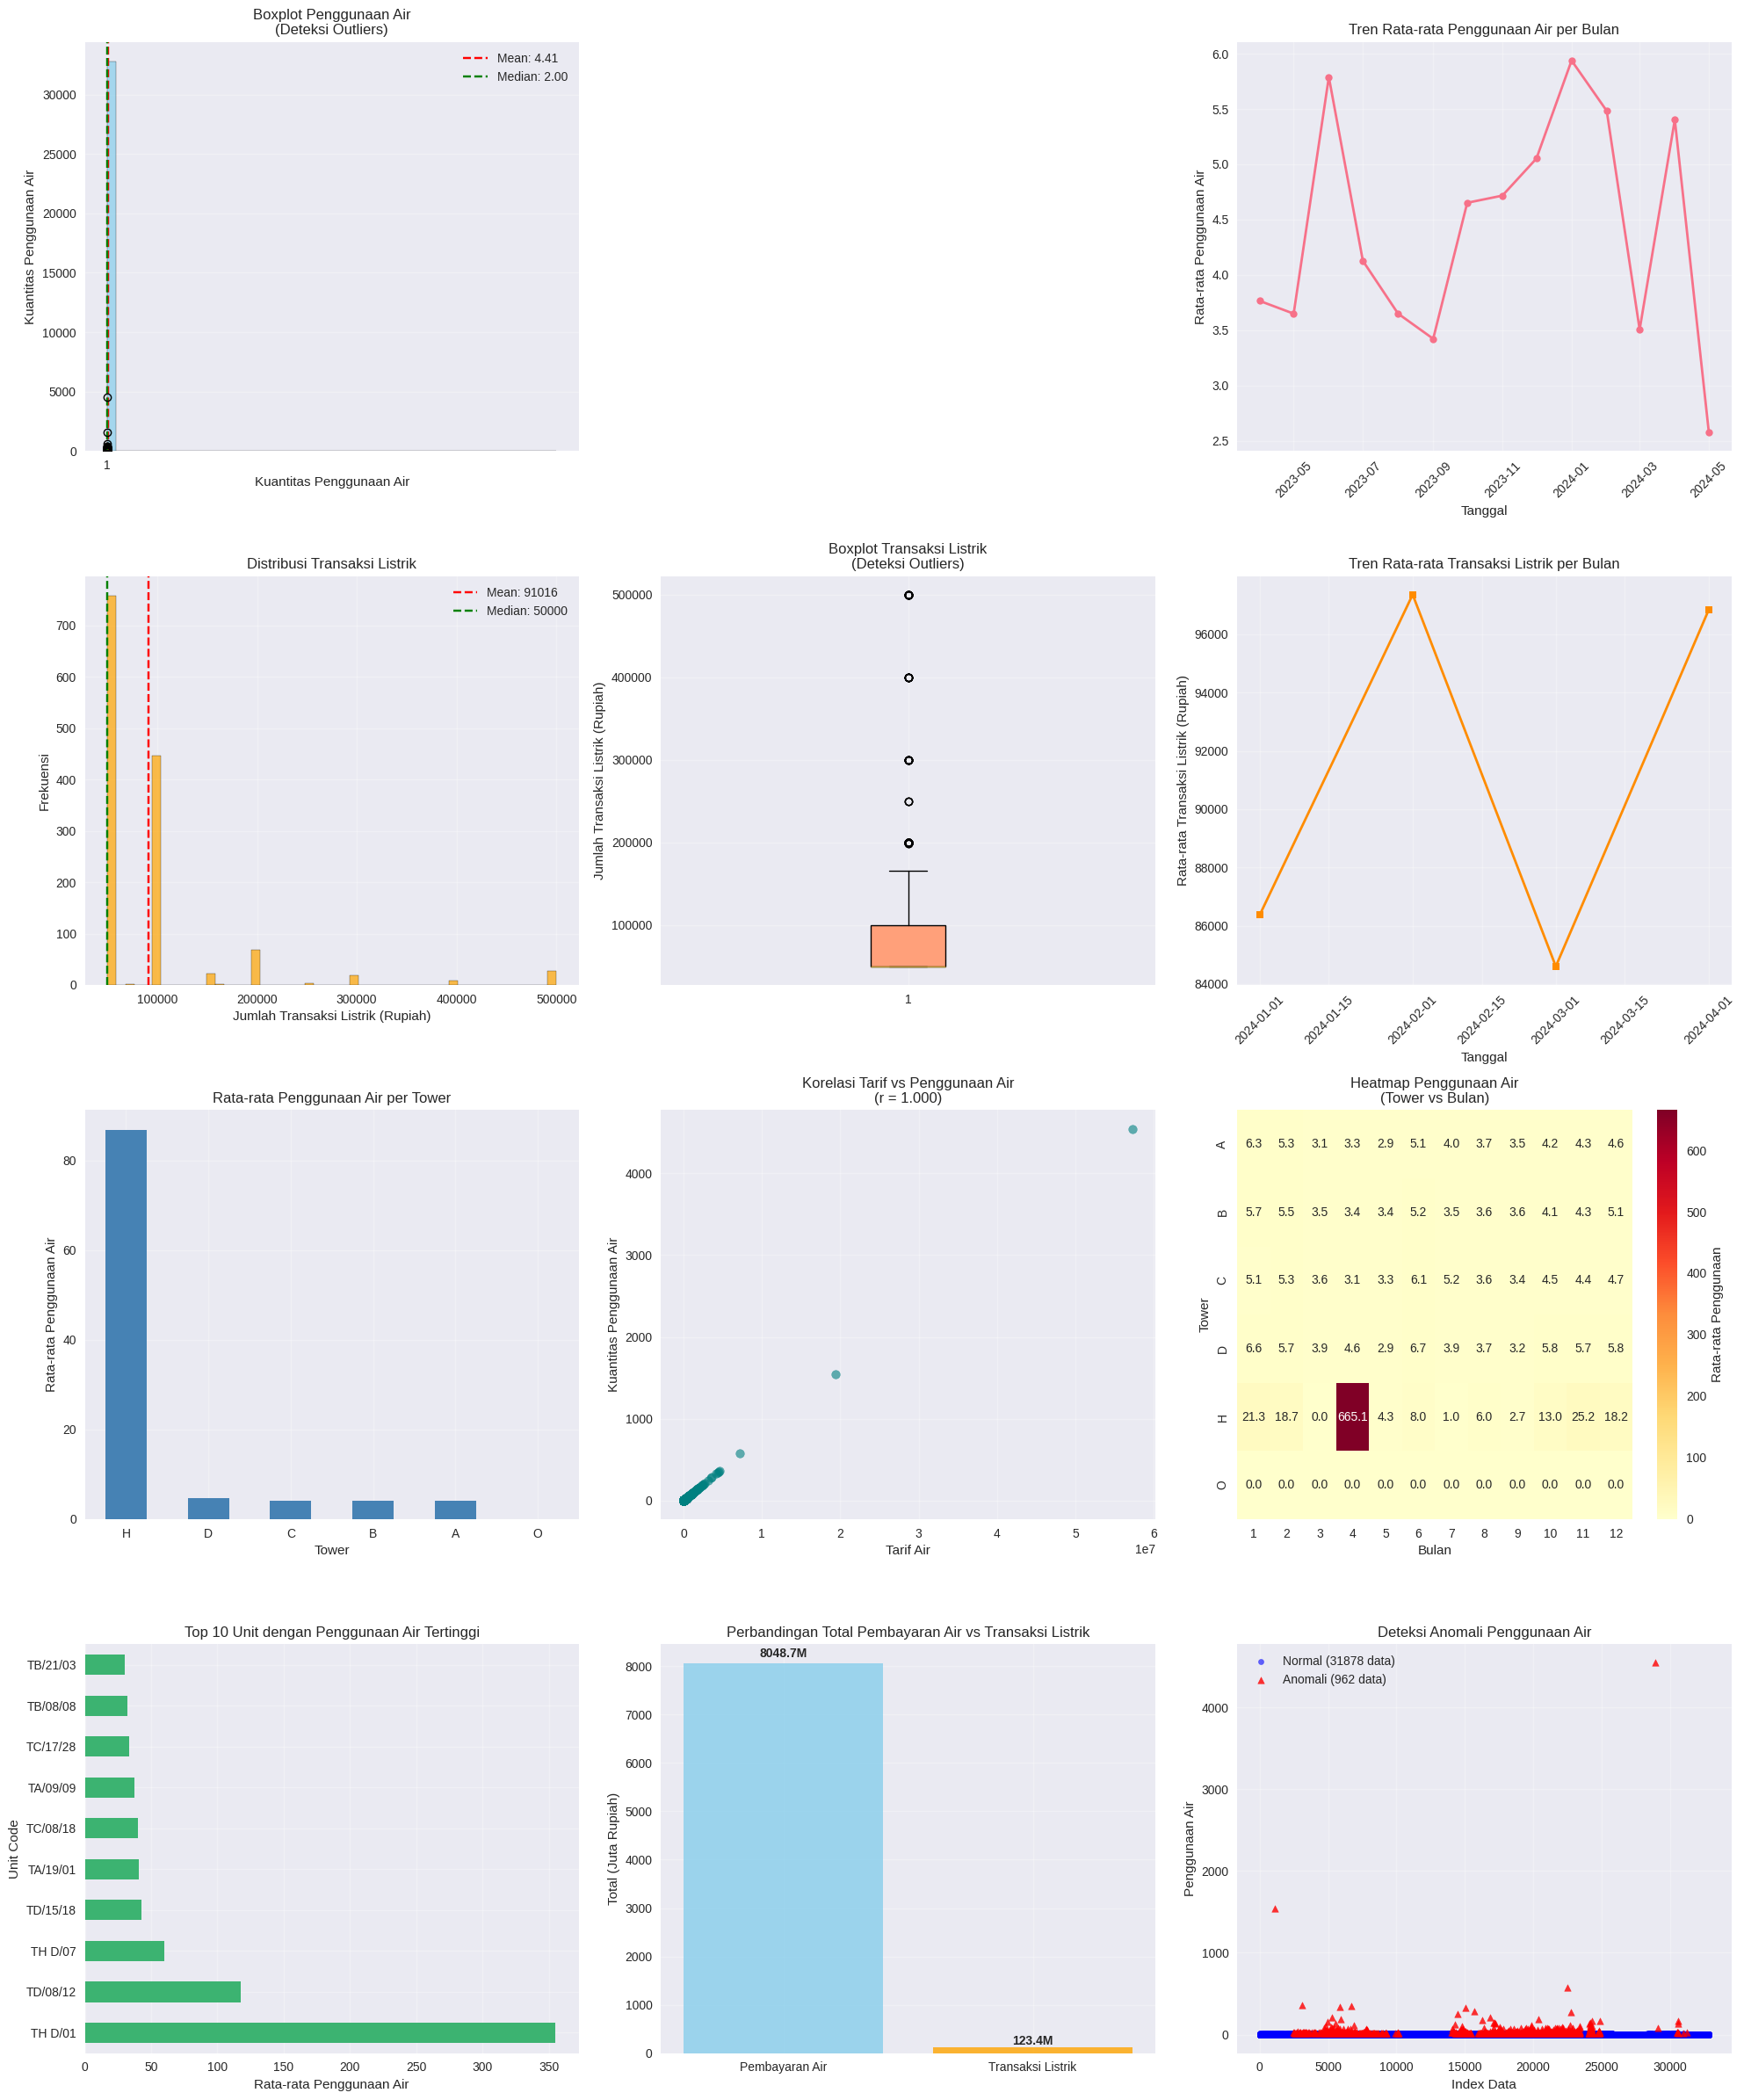


=== ANALISIS LANJUTAN ===

Analisis Musiman Penggunaan Air:
       mean    std  count
month                    
1      5.94  16.03   2353
2      5.48  10.57   2357
3      3.51   3.43   2346
4      4.59  70.10   4693
5      3.11   7.25   4706
6      5.79  15.09   2319
7      4.13   5.68   2291
8      3.65   4.10   2346
9      3.42   3.74   2375
10     4.65  12.65   2350
11     4.72   9.40   2352
12     5.05   9.21   2352

Unit dengan Variabilitas Penggunaan Tinggi:
           mean   std  count    cv
Unit Code                         
TB/12/18   0.60  2.32     15  3.87
TA/07/08   0.21  0.80     14  3.74
TA/01/17   0.07  0.27     14  3.74
TA/02/03   0.14  0.53     14  3.74
TB/21/07   0.07  0.27     14  3.74
TB/21/20   0.07  0.27     14  3.74
TB/15/16   0.07  0.27     14  3.74
TB/15/32   0.07  0.27     14  3.74
TB/16/07   0.07  0.27     14  3.74
TD/20/07   0.07  0.27     14  3.74

Total Pembayaran Air: Rp 8,048,706,546
Rata-rata Pembayaran per Transaksi: Rp 119,831
Total Transaksi Listrik

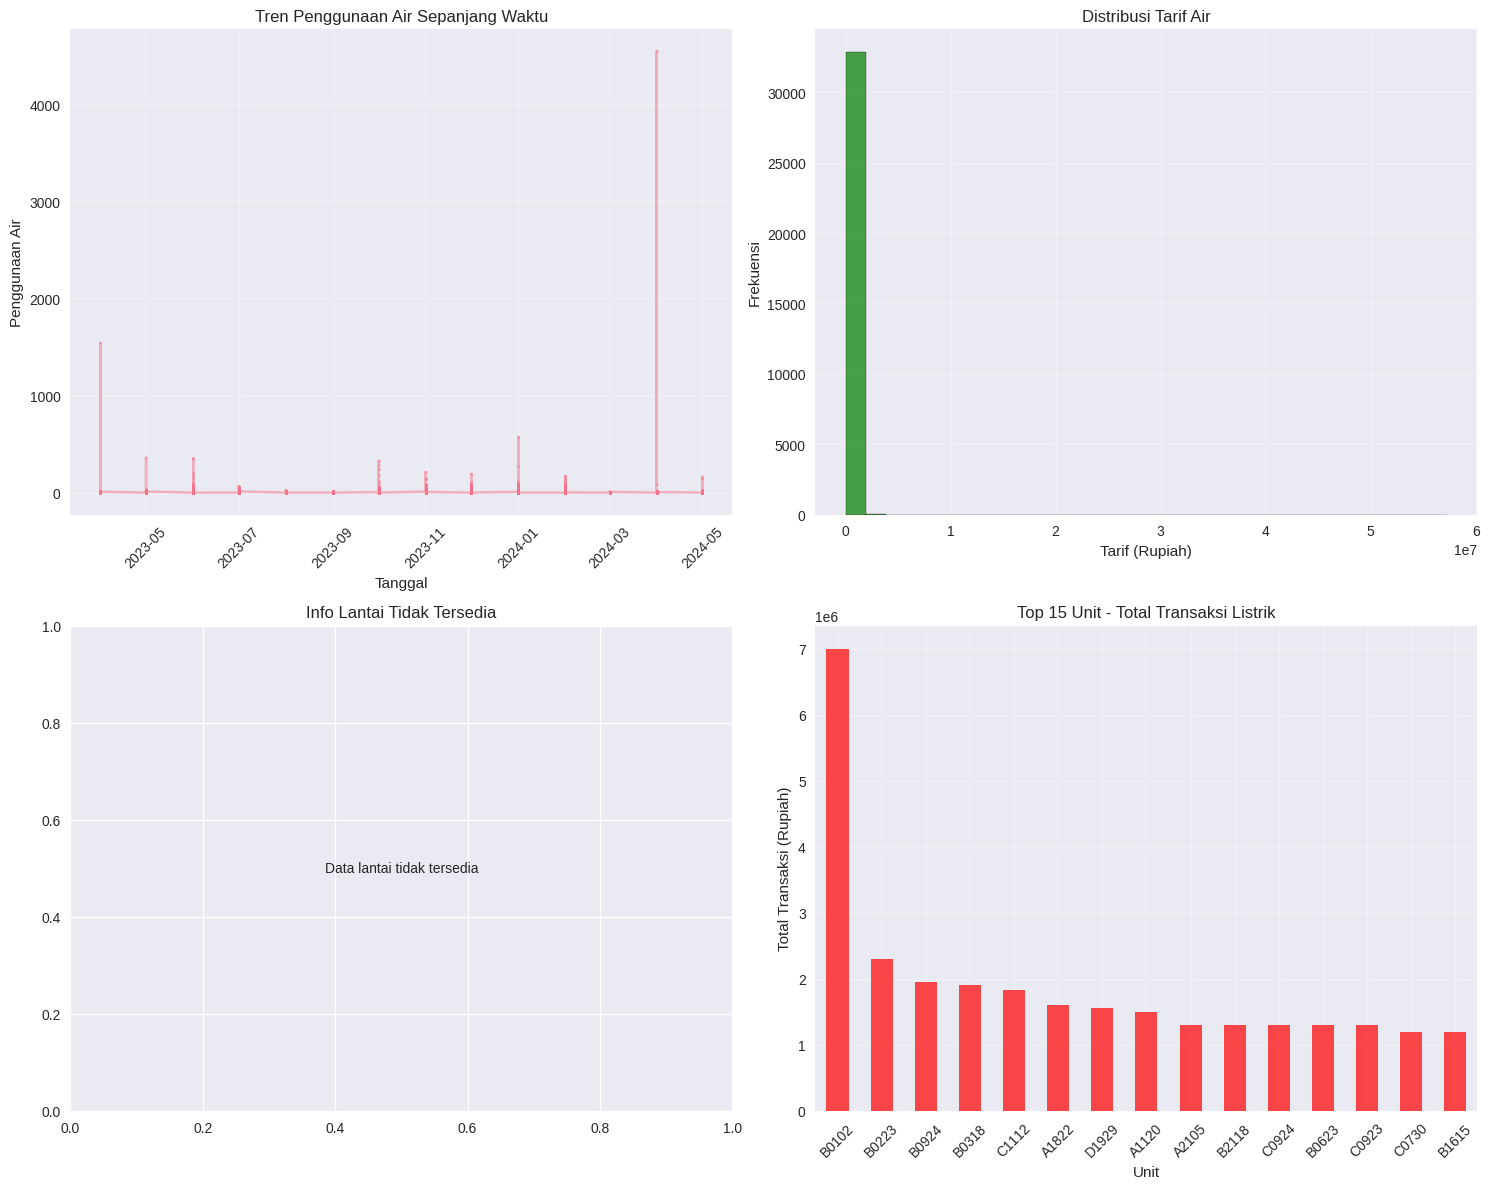


=== REKOMENDASI BERDASARKAN ANALISIS ===
1. Monitor unit dengan penggunaan air anomali tinggi untuk kemungkinan kebocoran
2. Evaluasi sistem tarif untuk unit dengan variabilitas tinggi
3. Optimalkan distribusi air berdasarkan pola penggunaan per tower
4. Pertimbangkan sistem pembayaran digital untuk efisiensi transaksi listrik
5. Lakukan audit berkala pada unit dengan pola konsumsi tidak normal


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style untuk plot
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Membaca semua dataset
df_tagihan_air = pd.read_csv('/content/tagihan_air_bersih1.csv', sep=';')
df_listrik = pd.read_csv('/content/transaksi_listrik_bersih.csv', sep=';')
df_pembayaran_air = pd.read_csv('/content/pembayaran_air_lengkap_bersih2.csv', sep=';')
df_master_unit = pd.read_csv('/content/master_unit_bersih.csv', sep=';')
df_invoice_air = pd.read_csv('/content/invoice_air.csv', sep=';')
df_unit_pemilik = pd.read_csv('/content/unit_pemilik3.csv', sep=';')

print("=== OVERVIEW DATASET ===")
print(f"Tagihan Air: {df_tagihan_air.shape}")
print(f"Transaksi Listrik: {df_listrik.shape}")
print(f"Pembayaran Air: {df_pembayaran_air.shape}")
print(f"Master Unit: {df_master_unit.shape}")
print(f"Invoice Air: {df_invoice_air.shape}")
print(f"Unit Pemilik: {df_unit_pemilik.shape}")

# =================== PREPROCESSING DATA ===================

# Konversi kolom tanggal
df_tagihan_air['thbl'] = pd.to_datetime(df_tagihan_air['thbl'])
df_listrik['tanggal'] = pd.to_datetime(df_listrik['tanggal'])
df_listrik['posted_date'] = pd.to_datetime(df_listrik['posted_date'])
df_pembayaran_air['Payment_Date'] = pd.to_datetime(df_pembayaran_air['Payment_Date'])
df_pembayaran_air['Posting_Date'] = pd.to_datetime(df_pembayaran_air['Posting_Date'])
df_invoice_air['Duedate'] = pd.to_datetime(df_invoice_air['Duedate'])

# Ekstrak informasi waktu
df_tagihan_air['year'] = df_tagihan_air['thbl'].dt.year
df_tagihan_air['month'] = df_tagihan_air['thbl'].dt.month
df_listrik['year'] = df_listrik['tanggal'].dt.year
df_listrik['month'] = df_listrik['tanggal'].dt.month

# =================== ANALISIS PENGGUNAAN AIR ===================

print("\n=== ANALISIS PENGGUNAAN AIR ===")

# Statistik deskriptif penggunaan air
print("\nStatistik Penggunaan Air (qty):")
print(df_tagihan_air['qty'].describe())

# Identifikasi anomali penggunaan air
Q1 = df_tagihan_air['qty'].quantile(0.25)
Q3 = df_tagihan_air['qty'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomali_air = df_tagihan_air[(df_tagihan_air['qty'] < lower_bound) | (df_tagihan_air['qty'] > upper_bound)]
print(f"\nJumlah anomali penggunaan air: {len(anomali_air)} dari {len(df_tagihan_air)} data")

# =================== ANALISIS TRANSAKSI LISTRIK ===================

print("\n=== ANALISIS TRANSAKSI LISTRIK ===")

# Statistik deskriptif transaksi listrik
print("\nStatistik Transaksi Listrik (amount_in):")
print(df_listrik['amount_in'].describe())

# Identifikasi anomali transaksi listrik
Q1_listrik = df_listrik['amount_in'].quantile(0.25)
Q3_listrik = df_listrik['amount_in'].quantile(0.75)
IQR_listrik = Q3_listrik - Q1_listrik
lower_bound_listrik = Q1_listrik - 1.5 * IQR_listrik
upper_bound_listrik = Q3_listrik + 1.5 * IQR_listrik

anomali_listrik = df_listrik[(df_listrik['amount_in'] < lower_bound_listrik) |
                            (df_listrik['amount_in'] > upper_bound_listrik)]
print(f"\nJumlah anomali transaksi listrik: {len(anomali_listrik)} dari {len(df_listrik)} data")

# =================== VISUALISASI ===================

# Membuat figure dengan multiple subplots
fig = plt.figure(figsize=(20, 24))

# 1. Distribusi Penggunaan Air
plt.subplot(4, 3, 1)
plt.hist(df_tagihan_air['qty'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df_tagihan_air['qty'].mean(), color='red', linestyle='--',
            label=f'Mean: {df_tagihan_air["qty"].mean():.2f}')
plt.axvline(df_tagihan_air['qty'].median(), color='green', linestyle='--',
            label=f'Median: {df_tagihan_air["qty"].median():.2f}')
plt.xlabel('Kuantitas Penggunaan Air')
plt.ylabel('Frekuensi')
plt.title('Distribusi Penggunaan Air')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Boxplot Penggunaan Air
plt.boxplot(df_tagihan_air['qty'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.ylabel('Kuantitas Penggunaan Air')
plt.title('Boxplot Penggunaan Air\n(Deteksi Outliers)')
plt.grid(True, alpha=0.3)

# 3. Tren Penggunaan Air per Bulan
plt.subplot(4, 3, 3)
monthly_usage = df_tagihan_air.groupby(['year', 'month'])['qty'].mean().reset_index()
monthly_usage['date'] = pd.to_datetime(monthly_usage[['year', 'month']].assign(day=1))
plt.plot(monthly_usage['date'], monthly_usage['qty'], marker='o', linewidth=2, markersize=6)
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Penggunaan Air')
plt.title('Tren Rata-rata Penggunaan Air per Bulan')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 4. Distribusi Transaksi Listrik
plt.subplot(4, 3, 4)
plt.hist(df_listrik['amount_in'], bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(df_listrik['amount_in'].mean(), color='red', linestyle='--',
            label=f'Mean: {df_listrik["amount_in"].mean():.0f}')
plt.axvline(df_listrik['amount_in'].median(), color='green', linestyle='--',
            label=f'Median: {df_listrik["amount_in"].median():.0f}')
plt.xlabel('Jumlah Transaksi Listrik (Rupiah)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Transaksi Listrik')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Boxplot Transaksi Listrik
plt.subplot(4, 3, 5)
plt.boxplot(df_listrik['amount_in'], patch_artist=True,
            boxprops=dict(facecolor='lightsalmon'))
plt.ylabel('Jumlah Transaksi Listrik (Rupiah)')
plt.title('Boxplot Transaksi Listrik\n(Deteksi Outliers)')
plt.grid(True, alpha=0.3)

# 6. Tren Transaksi Listrik per Bulan
plt.subplot(4, 3, 6)
monthly_electric = df_listrik.groupby(['year', 'month'])['amount_in'].mean().reset_index()
monthly_electric['date'] = pd.to_datetime(monthly_electric[['year', 'month']].assign(day=1))
plt.plot(monthly_electric['date'], monthly_electric['amount_in'],
         marker='s', linewidth=2, markersize=6, color='darkorange')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Transaksi Listrik (Rupiah)')
plt.title('Tren Rata-rata Transaksi Listrik per Bulan')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 7. Penggunaan Air per Tower
plt.subplot(4, 3, 7)
# Ekstrak kode tower dari Unit Code
df_tagihan_air['tower'] = df_tagihan_air['Unit Code'].str[1]
tower_usage = df_tagihan_air.groupby('tower')['qty'].mean().sort_values(ascending=False)
tower_usage.plot(kind='bar', color='steelblue')
plt.xlabel('Tower')
plt.ylabel('Rata-rata Penggunaan Air')
plt.title('Rata-rata Penggunaan Air per Tower')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# 8. Korelasi antara Tarif dan Penggunaan Air
plt.subplot(4, 3, 8)
plt.scatter(df_tagihan_air['tarif'], df_tagihan_air['qty'], alpha=0.6, color='teal')
correlation = df_tagihan_air['tarif'].corr(df_tagihan_air['qty'])
plt.xlabel('Tarif Air')
plt.ylabel('Kuantitas Penggunaan Air')
plt.title(f'Korelasi Tarif vs Penggunaan Air\n(r = {correlation:.3f})')
plt.grid(True, alpha=0.3)

# 9. Heatmap Penggunaan Air per Bulan dan Tower
plt.subplot(4, 3, 9)
pivot_data = df_tagihan_air.pivot_table(values='qty', index='tower',
                                        columns='month', aggfunc='mean', fill_value=0)
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Rata-rata Penggunaan'})
plt.title('Heatmap Penggunaan Air\n(Tower vs Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Tower')

# 10. Top 10 Unit dengan Penggunaan Air Tertinggi
plt.subplot(4, 3, 10)
top_units = df_tagihan_air.groupby('Unit Code')['qty'].mean().sort_values(ascending=False).head(10)
top_units.plot(kind='barh', color='mediumseagreen')
plt.xlabel('Rata-rata Penggunaan Air')
plt.title('Top 10 Unit dengan Penggunaan Air Tertinggi')
plt.grid(True, alpha=0.3)

# 11. Perbandingan Total Pembayaran Air vs Listrik
plt.subplot(4, 3, 11)
total_air = df_pembayaran_air['Receipt_Payment'].sum() / 1e6  # dalam jutaan
total_listrik = df_listrik['amount_in'].sum() / 1e6  # dalam jutaan
categories = ['Pembayaran Air', 'Transaksi Listrik']
values = [total_air, total_listrik]
colors = ['skyblue', 'orange']
bars = plt.bar(categories, values, color=colors, alpha=0.8)
plt.ylabel('Total (Juta Rupiah)')
plt.title('Perbandingan Total Pembayaran Air vs Transaksi Listrik')
# Menambahkan nilai pada bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01,
             f'{value:.1f}M', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3)

# 12. Anomali Detection Scatter Plot
plt.subplot(4, 3, 12)
# Plot normal data
normal_air = df_tagihan_air[(df_tagihan_air['qty'] >= lower_bound) &
                           (df_tagihan_air['qty'] <= upper_bound)]
plt.scatter(normal_air.index, normal_air['qty'], alpha=0.6, color='blue',
           label=f'Normal ({len(normal_air)} data)', s=20)
# Plot anomali
plt.scatter(anomali_air.index, anomali_air['qty'], alpha=0.8, color='red',
           label=f'Anomali ({len(anomali_air)} data)', s=30, marker='^')
plt.xlabel('Index Data')
plt.ylabel('Penggunaan Air')
plt.title('Deteksi Anomali Penggunaan Air')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =================== ANALISIS LANJUTAN ===================

print("\n=== ANALISIS LANJUTAN ===")

# Analisis seasonality
print("\nAnalisis Musiman Penggunaan Air:")
seasonal_analysis = df_tagihan_air.groupby('month')['qty'].agg(['mean', 'std', 'count'])
print(seasonal_analysis.round(2))

# Unit dengan penggunaan tidak konsisten
print("\nUnit dengan Variabilitas Penggunaan Tinggi:")
unit_variability = df_tagihan_air.groupby('Unit Code')['qty'].agg(['mean', 'std', 'count'])
unit_variability['cv'] = unit_variability['std'] / unit_variability['mean']  # Coefficient of variation
high_variability = unit_variability[unit_variability['cv'] > 1].sort_values('cv', ascending=False)
print(high_variability.head(10).round(2))

# Analisis pembayaran air
print(f"\nTotal Pembayaran Air: Rp {df_pembayaran_air['Receipt_Payment'].sum():,.0f}")
print(f"Rata-rata Pembayaran per Transaksi: Rp {df_pembayaran_air['Receipt_Payment'].mean():,.0f}")
print(f"Total Transaksi Listrik: Rp {df_listrik['amount_in'].sum():,.0f}")
print(f"Rata-rata Transaksi Listrik: Rp {df_listrik['amount_in'].mean():,.0f}")

# Analisis berdasarkan tower/gedung
print("\nRingkasan per Tower:")
tower_summary = df_tagihan_air.groupby('tower').agg({
    'qty': ['count', 'mean', 'std', 'sum'],
    'tarif': 'mean'
}).round(2)
tower_summary.columns = ['Jumlah_Unit', 'Rata_Penggunaan', 'Std_Penggunaan', 'Total_Penggunaan', 'Rata_Tarif']
print(tower_summary)

print("\n=== KESIMPULAN ANALISIS ===")
print(f"1. Rata-rata penggunaan air per unit: {df_tagihan_air['qty'].mean():.2f} unit")
print(f"2. Standar deviasi penggunaan air: {df_tagihan_air['qty'].std():.2f} unit")
print(f"3. Persentase anomali penggunaan air: {(len(anomali_air)/len(df_tagihan_air)*100):.2f}%")
print(f"4. Rata-rata transaksi listrik: Rp {df_listrik['amount_in'].mean():,.0f}")
print(f"5. Persentase anomali transaksi listrik: {(len(anomali_listrik)/len(df_listrik)*100):.2f}%")
print(f"6. Tower dengan penggunaan air tertinggi: {tower_summary.idxmax()['Rata_Penggunaan']}")
print(f"7. Bulan dengan penggunaan air tertinggi: Bulan {seasonal_analysis.idxmax()['mean']}")

# Membuat plot tambahan untuk insight bisnis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Trend penggunaan air vs waktu
axes[0,0].plot(df_tagihan_air['thbl'], df_tagihan_air['qty'], alpha=0.5, marker='o', markersize=2)
axes[0,0].set_title('Tren Penggunaan Air Sepanjang Waktu')
axes[0,0].set_xlabel('Tanggal')
axes[0,0].set_ylabel('Penggunaan Air')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Distribusi tarif air
axes[0,1].hist(df_tagihan_air['tarif'], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0,1].set_title('Distribusi Tarif Air')
axes[0,1].set_xlabel('Tarif (Rupiah)')
axes[0,1].set_ylabel('Frekuensi')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Penggunaan air per lantai (jika ada info lantai)
if 'floor' in df_master_unit.columns:
    # Merge dengan master unit untuk mendapatkan info lantai
    df_merged = df_tagihan_air.merge(df_master_unit, left_on='Unit Code', right_on='kode_unit2', how='left')
    if not df_merged.empty and df_merged['floor'].notna().any():
        floor_usage = df_merged.groupby('floor')['qty'].mean()
        floor_usage.plot(kind='bar', ax=axes[1,0], color='purple', alpha=0.7)
        axes[1,0].set_title('Rata-rata Penggunaan Air per Lantai')
        axes[1,0].set_xlabel('Lantai')
        axes[1,0].set_ylabel('Rata-rata Penggunaan Air')
        axes[1,0].grid(True, alpha=0.3)
    else:
        axes[1,0].text(0.5, 0.5, 'Data lantai tidak tersedia', ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Info Lantai Tidak Tersedia')
else:
    axes[1,0].text(0.5, 0.5, 'Data lantai tidak tersedia', ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Info Lantai Tidak Tersedia')

# Plot 4: Perbandingan metode pembayaran listrik
if 'unit' in df_listrik.columns:
    # Ekstrak info unit untuk analisis pola penggunaan
    unit_electric = df_listrik.groupby('unit')['amount_in'].sum().sort_values(ascending=False).head(15)
    unit_electric.plot(kind='bar', ax=axes[1,1], color='red', alpha=0.7)
    axes[1,1].set_title('Top 15 Unit - Total Transaksi Listrik')
    axes[1,1].set_xlabel('Unit')
    axes[1,1].set_ylabel('Total Transaksi (Rupiah)')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== REKOMENDASI BERDASARKAN ANALISIS ===")
print("1. Monitor unit dengan penggunaan air anomali tinggi untuk kemungkinan kebocoran")
print("2. Evaluasi sistem tarif untuk unit dengan variabilitas tinggi")
print("3. Optimalkan distribusi air berdasarkan pola penggunaan per tower")
print("4. Pertimbangkan sistem pembayaran digital untuk efisiensi transaksi listrik")
print("5. Lakukan audit berkala pada unit dengan pola konsumsi tidak normal")

## Yang kepake

=== OVERVIEW DATASET ===
Tagihan Air: (32840, 8)
Transaksi Listrik: (1356, 6)
Pembayaran Air: (67173, 17)
Master Unit: (2474, 6)
Invoice Air: (17446, 12)
Unit Pemilik: (2380, 4)

=== ANALISIS PENGGUNAAN AIR ===

Statistik Penggunaan Air (qty):
count    32840.000000
mean         4.408800
std         27.964776
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max       4545.000000
Name: qty, dtype: float64

Jumlah anomali penggunaan air: 962 dari 32840 data

=== ANALISIS TRANSAKSI LISTRIK ===

Statistik Transaksi Listrik (amount_in):
count      1356.000000
mean      91015.629794
std       79332.726345
min       50000.000000
25%       50000.000000
50%       50000.000000
75%      100000.000000
max      500000.000000
Name: amount_in, dtype: float64

Jumlah anomali transaksi listrik: 126 dari 1356 data


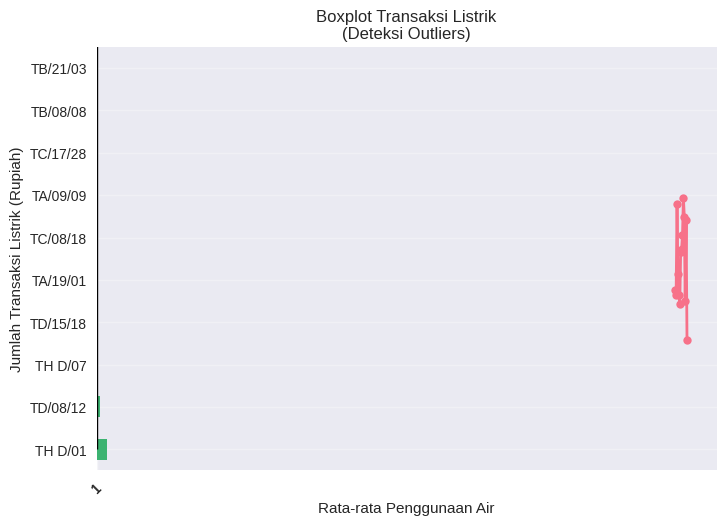

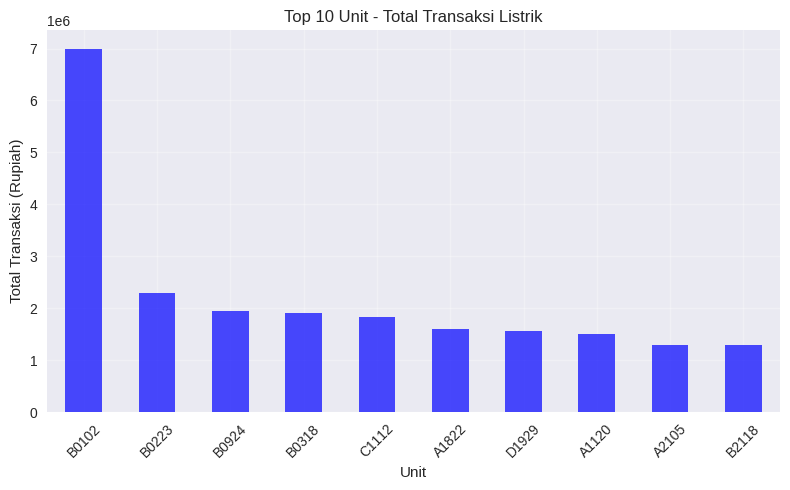

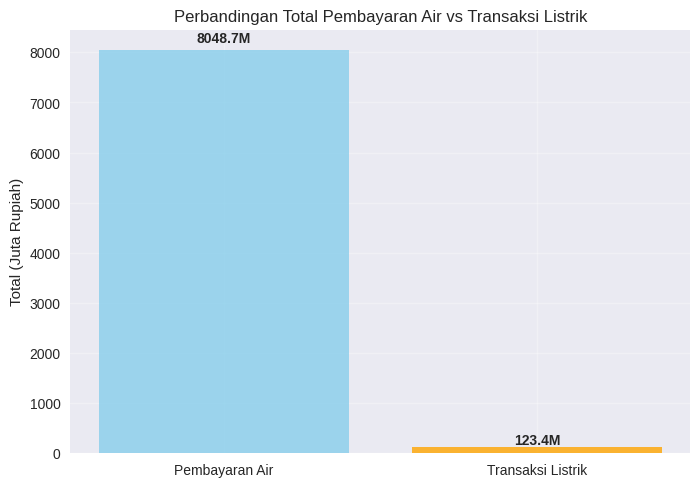

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style untuk plot
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Membaca semua dataset
df_tagihan_air = pd.read_csv('/content/tagihan_air_bersih1.csv', sep=';')
df_listrik = pd.read_csv('/content/transaksi_listrik_bersih.csv', sep=';')
df_pembayaran_air = pd.read_csv('/content/pembayaran_air_lengkap_bersih2.csv', sep=';')
df_master_unit = pd.read_csv('/content/master_unit_bersih.csv', sep=';')
df_invoice_air = pd.read_csv('/content/invoice_air.csv', sep=';')
df_unit_pemilik = pd.read_csv('/content/unit_pemilik3.csv', sep=';')

print("=== OVERVIEW DATASET ===")
print(f"Tagihan Air: {df_tagihan_air.shape}")
print(f"Transaksi Listrik: {df_listrik.shape}")
print(f"Pembayaran Air: {df_pembayaran_air.shape}")
print(f"Master Unit: {df_master_unit.shape}")
print(f"Invoice Air: {df_invoice_air.shape}")
print(f"Unit Pemilik: {df_unit_pemilik.shape}")

# =================== PREPROCESSING DATA ===================

# Konversi kolom tanggal
df_tagihan_air['thbl'] = pd.to_datetime(df_tagihan_air['thbl'])
df_listrik['tanggal'] = pd.to_datetime(df_listrik['tanggal'])
df_listrik['posted_date'] = pd.to_datetime(df_listrik['posted_date'])
df_pembayaran_air['Payment_Date'] = pd.to_datetime(df_pembayaran_air['Payment_Date'])
df_pembayaran_air['Posting_Date'] = pd.to_datetime(df_pembayaran_air['Posting_Date'])
df_invoice_air['Duedate'] = pd.to_datetime(df_invoice_air['Duedate'])

# Ekstrak informasi waktu
df_tagihan_air['year'] = df_tagihan_air['thbl'].dt.year
df_tagihan_air['month'] = df_tagihan_air['thbl'].dt.month
df_listrik['year'] = df_listrik['tanggal'].dt.year
df_listrik['month'] = df_listrik['tanggal'].dt.month

# =================== ANALISIS PENGGUNAAN AIR ===================

print("\n=== ANALISIS PENGGUNAAN AIR ===")

# Statistik deskriptif penggunaan air
print("\nStatistik Penggunaan Air (qty):")
print(df_tagihan_air['qty'].describe())

# Identifikasi anomali penggunaan air
Q1 = df_tagihan_air['qty'].quantile(0.25)
Q3 = df_tagihan_air['qty'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomali_air = df_tagihan_air[(df_tagihan_air['qty'] < lower_bound) | (df_tagihan_air['qty'] > upper_bound)]
print(f"\nJumlah anomali penggunaan air: {len(anomali_air)} dari {len(df_tagihan_air)} data")

# =================== ANALISIS TRANSAKSI LISTRIK ===================

print("\n=== ANALISIS TRANSAKSI LISTRIK ===")

# Statistik deskriptif transaksi listrik
print("\nStatistik Transaksi Listrik (amount_in):")
print(df_listrik['amount_in'].describe())

# Identifikasi anomali transaksi listrik
Q1_listrik = df_listrik['amount_in'].quantile(0.25)
Q3_listrik = df_listrik['amount_in'].quantile(0.75)
IQR_listrik = Q3_listrik - Q1_listrik
lower_bound_listrik = Q1_listrik - 1.5 * IQR_listrik
upper_bound_listrik = Q3_listrik + 1.5 * IQR_listrik

anomali_listrik = df_listrik[(df_listrik['amount_in'] < lower_bound_listrik) |
                            (df_listrik['amount_in'] > upper_bound_listrik)]
print(f"\nJumlah anomali transaksi listrik: {len(anomali_listrik)} dari {len(df_listrik)} data")

plt.boxplot(df_tagihan_air['qty'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.ylabel('Kuantitas Penggunaan Air')
plt.title('Boxplot Penggunaan Air\n(Deteksi Outliers)')
plt.grid(True, alpha=0.3)

monthly_usage = df_tagihan_air.groupby(['year', 'month'])['qty'].mean().reset_index()
monthly_usage['date'] = pd.to_datetime(monthly_usage[['year', 'month']].assign(day=1))
plt.plot(monthly_usage['date'], monthly_usage['qty'], marker='o', linewidth=2, markersize=6)
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Penggunaan Air')
plt.title('Tren Rata-rata Penggunaan Air per Bulan')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

top_units = df_tagihan_air.groupby('Unit Code')['qty'].mean().sort_values(ascending=False).head(10)
top_units.plot(kind='barh', color='mediumseagreen')
plt.xlabel('Rata-rata Penggunaan Air')
plt.title('Top 10 Unit dengan Penggunaan Air Tertinggi')
plt.grid(True, alpha=0.3)

plt.boxplot(df_listrik['amount_in'], patch_artist=True,
            boxprops=dict(facecolor='lightsalmon'))
plt.ylabel('Jumlah Transaksi Listrik (Rupiah)')
plt.title('Boxplot Transaksi Listrik\n(Deteksi Outliers)')
plt.grid(True, alpha=0.3)

unit_electric = df_listrik.groupby('unit')['amount_in'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
unit_electric.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 10 Unit - Total Transaksi Listrik')
plt.xlabel('Unit')
plt.ylabel('Total Transaksi (Rupiah)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

total_air = df_pembayaran_air['Receipt_Payment'].sum() / 1e6  # dalam jutaan
total_listrik = df_listrik['amount_in'].sum() / 1e6  # dalam jutaan
categories = ['Pembayaran Air', 'Transaksi Listrik']
values = [total_air, total_listrik]
colors = ['skyblue', 'orange']
bars = plt.bar(categories, values, color=colors, alpha=0.8)
plt.ylabel('Total (Juta Rupiah)')
plt.title('Perbandingan Total Pembayaran Air vs Transaksi Listrik')
# Menambahkan nilai pada bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01,
             f'{value:.1f}M', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style untuk plot
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Membaca semua dataset
df_tagihan_air = pd.read_csv('/content/tagihan_air_bersih1.csv', sep=';')
df_listrik = pd.read_csv('/content/transaksi_listrik_bersih.csv', sep=';')
df_pembayaran_air = pd.read_csv('/content/pembayaran_air_lengkap_bersih2.csv', sep=';')
df_master_unit = pd.read_csv('/content/master_unit_bersih.csv', sep=';')
df_invoice_air = pd.read_csv('/content/invoice_air.csv', sep=';')
df_unit_pemilik = pd.read_csv('/content/unit_pemilik3.csv', sep=';')

print("=== OVERVIEW DATASET ===")
print(f"Tagihan Air: {df_tagihan_air.shape}")
print(f"Transaksi Listrik: {df_listrik.shape}")
print(f"Pembayaran Air: {df_pembayaran_air.shape}")
print(f"Master Unit: {df_master_unit.shape}")
print(f"Invoice Air: {df_invoice_air.shape}")
print(f"Unit Pemilik: {df_unit_pemilik.shape}")

# =================== PREPROCESSING DATA ===================

# Konversi kolom tanggal
df_tagihan_air['thbl'] = pd.to_datetime(df_tagihan_air['thbl'])
df_listrik['tanggal'] = pd.to_datetime(df_listrik['tanggal'])
df_listrik['posted_date'] = pd.to_datetime(df_listrik['posted_date'])
df_pembayaran_air['Payment_Date'] = pd.to_datetime(df_pembayaran_air['Payment_Date'])
df_pembayaran_air['Posting_Date'] = pd.to_datetime(df_pembayaran_air['Posting_Date'])
df_invoice_air['Duedate'] = pd.to_datetime(df_invoice_air['Duedate'])

# Ekstrak informasi waktu
df_tagihan_air['year'] = df_tagihan_air['thbl'].dt.year
df_tagihan_air['month'] = df_tagihan_air['thbl'].dt.month
df_listrik['year'] = df_listrik['tanggal'].dt.year
df_listrik['month'] = df_listrik['tanggal'].dt.month

# =================== ANALISIS PENGGUNAAN AIR ===================

print("\n=== ANALISIS PENGGUNAAN AIR ===")

# Statistik deskriptif penggunaan air
print("\nStatistik Penggunaan Air (qty):")
print(df_tagihan_air['qty'].describe())

# Identifikasi anomali penggunaan air
Q1 = df_tagihan_air['qty'].quantile(0.25)
Q3 = df_tagihan_air['qty'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomali_air = df_tagihan_air[(df_tagihan_air['qty'] < lower_bound) | (df_tagihan_air['qty'] > upper_bound)]
print(f"\nJumlah anomali penggunaan air: {len(anomali_air)} dari {len(df_tagihan_air)} data")

# =================== ANALISIS TRANSAKSI LISTRIK ===================

print("\n=== ANALISIS TRANSAKSI LISTRIK ===")

# Statistik deskriptif transaksi listrik
print("\nStatistik Transaksi Listrik (amount_in):")
print(df_listrik['amount_in'].describe())

# Identifikasi anomali transaksi listrik
Q1_listrik = df_listrik['amount_in'].quantile(0.25)
Q3_listrik = df_listrik['amount_in'].quantile(0.75)
IQR_listrik = Q3_listrik - Q1_listrik
lower_bound_listrik = Q1_listrik - 1.5 * IQR_listrik
upper_bound_listrik = Q3_listrik + 1.5 * IQR_listrik

anomali_listrik = df_listrik[(df_listrik['amount_in'] < lower_bound_listrik) |
                            (df_listrik['amount_in'] > upper_bound_listrik)]
print(f"\nJumlah anomali transaksi listrik: {len(anomali_listrik)} dari {len(df_listrik)} data")

=== OVERVIEW DATASET ===
Tagihan Air: (32840, 8)
Transaksi Listrik: (1356, 6)
Pembayaran Air: (67173, 17)
Master Unit: (2474, 6)
Invoice Air: (17446, 12)
Unit Pemilik: (2380, 4)

=== ANALISIS PENGGUNAAN AIR ===

Statistik Penggunaan Air (qty):
count    32840.000000
mean         4.408800
std         27.964776
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max       4545.000000
Name: qty, dtype: float64

Jumlah anomali penggunaan air: 962 dari 32840 data

=== ANALISIS TRANSAKSI LISTRIK ===

Statistik Transaksi Listrik (amount_in):
count      1356.000000
mean      91015.629794
std       79332.726345
min       50000.000000
25%       50000.000000
50%       50000.000000
75%      100000.000000
max      500000.000000
Name: amount_in, dtype: float64

Jumlah anomali transaksi listrik: 126 dari 1356 data


# Air

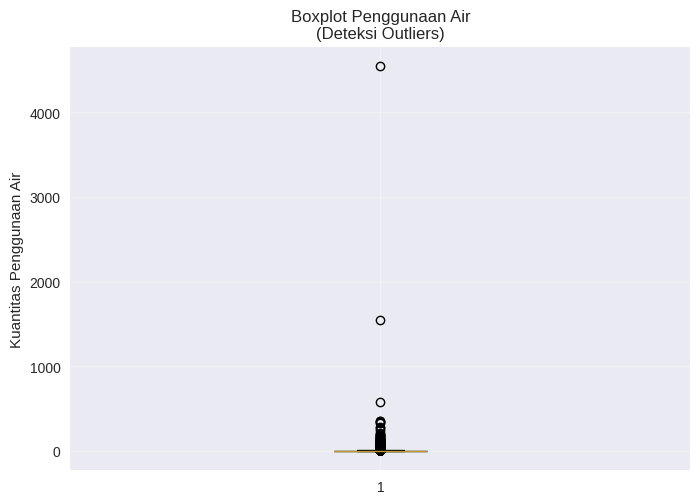

In [ ]:
plt.boxplot(df_tagihan_air['qty'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.ylabel('Kuantitas Penggunaan Air')
plt.title('Boxplot Penggunaan Air\n(Deteksi Outliers)')
plt.grid(True, alpha=0.3)

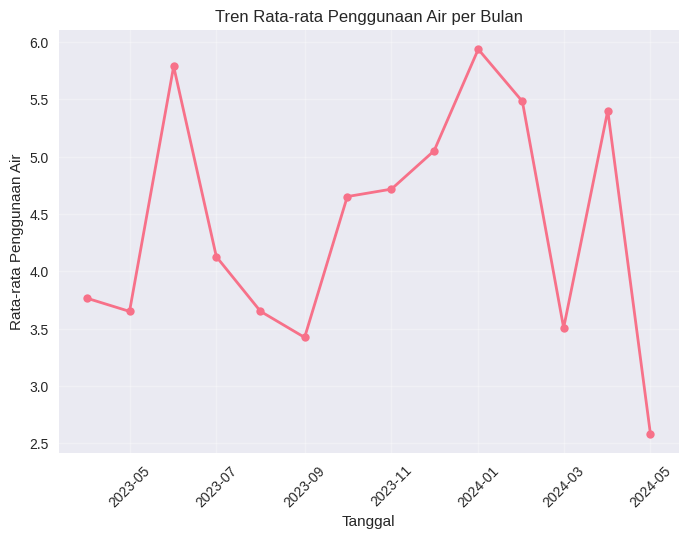

In [ ]:
monthly_usage = df_tagihan_air.groupby(['year', 'month'])['qty'].mean().reset_index()
monthly_usage['date'] = pd.to_datetime(monthly_usage[['year', 'month']].assign(day=1))
plt.plot(monthly_usage['date'], monthly_usage['qty'], marker='o', linewidth=2, markersize=6)
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Penggunaan Air')
plt.title('Tren Rata-rata Penggunaan Air per Bulan')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

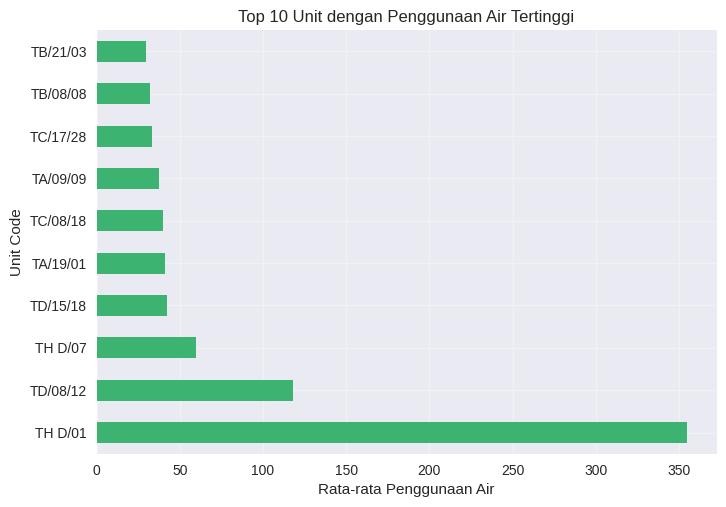

In [ ]:
top_units = df_tagihan_air.groupby('Unit Code')['qty'].mean().sort_values(ascending=False).head(10)
top_units.plot(kind='barh', color='mediumseagreen')
plt.xlabel('Rata-rata Penggunaan Air')
plt.title('Top 10 Unit dengan Penggunaan Air Tertinggi')
plt.grid(True, alpha=0.3)

In [ ]:
# Identifikasi anomali penggunaan air
Q1 = df_tagihan_air['qty'].quantile(0.25)
Q3 = df_tagihan_air['qty'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomali_air = df_tagihan_air[(df_tagihan_air['qty'] < lower_bound) | (df_tagihan_air['qty'] > upper_bound)]
print(f"\nJumlah anomali penggunaan air: {len(anomali_air)} dari {len(df_tagihan_air)} data")


Jumlah anomali penggunaan air: 962 dari 32840 data


# Listrik

In [ ]:
# Identifikasi anomali transaksi listrik
Q1_listrik = df_listrik['amount_in'].quantile(0.25)
Q3_listrik = df_listrik['amount_in'].quantile(0.75)
IQR_listrik = Q3_listrik - Q1_listrik
lower_bound_listrik = Q1_listrik - 1.5 * IQR_listrik
upper_bound_listrik = Q3_listrik + 1.5 * IQR_listrik

anomali_listrik = df_listrik[(df_listrik['amount_in'] < lower_bound_listrik) |
                            (df_listrik['amount_in'] > upper_bound_listrik)]
print(f"\nJumlah anomali transaksi listrik: {len(anomali_listrik)} dari {len(df_listrik)} data")


Jumlah anomali transaksi listrik: 126 dari 1356 data


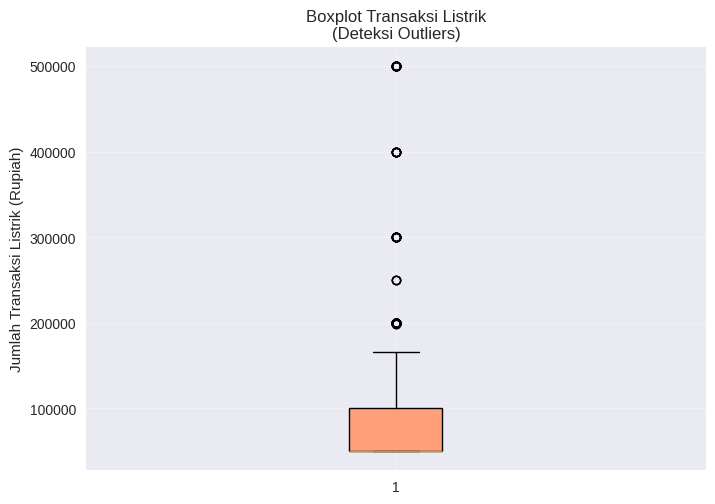

In [ ]:
plt.boxplot(df_listrik['amount_in'], patch_artist=True,
            boxprops=dict(facecolor='lightsalmon'))
plt.ylabel('Jumlah Transaksi Listrik (Rupiah)')
plt.title('Boxplot Transaksi Listrik\n(Deteksi Outliers)')
plt.grid(True, alpha=0.3)

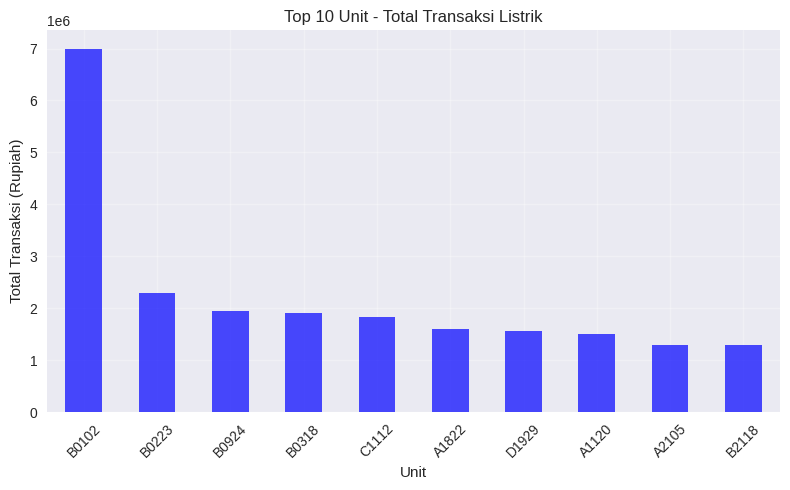

In [ ]:
unit_electric = df_listrik.groupby('unit')['amount_in'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
unit_electric.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 10 Unit - Total Transaksi Listrik')
plt.xlabel('Unit')
plt.ylabel('Total Transaksi (Rupiah)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

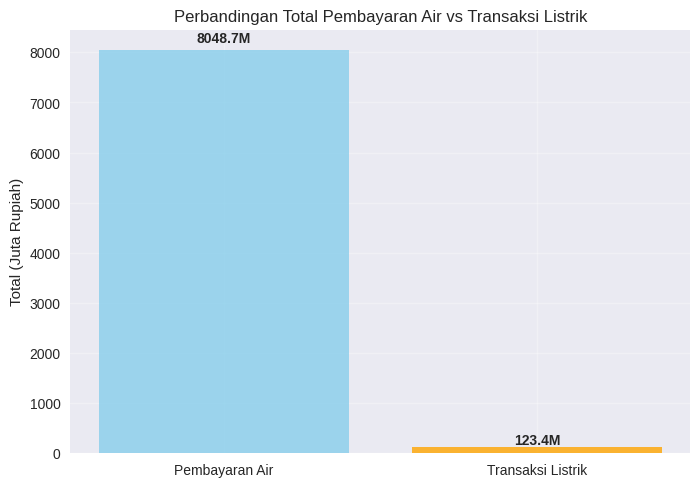

In [ ]:
total_air = df_pembayaran_air['Receipt_Payment'].sum() / 1e6  # dalam jutaan
total_listrik = df_listrik['amount_in'].sum() / 1e6  # dalam jutaan
categories = ['Pembayaran Air', 'Transaksi Listrik']
values = [total_air, total_listrik]
colors = ['skyblue', 'orange']
bars = plt.bar(categories, values, color=colors, alpha=0.8)
plt.ylabel('Total (Juta Rupiah)')
plt.title('Perbandingan Total Pembayaran Air vs Transaksi Listrik')
# Menambahkan nilai pada bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01,
             f'{value:.1f}M', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3)

# Evaluasi & Eksperimen Model

=== OVERVIEW DATASET ===
Tagihan Air: (32840, 8)
Transaksi Listrik: (1356, 6)
Pembayaran Air: (67173, 17)
Master Unit: (2474, 6)
Invoice Air: (17446, 12)
Unit Pemilik: (2380, 4)

=== FEATURE ENGINEERING ===
Features baru berhasil dibuat:
- usage_per_day, seasonal_factor
- qty_rolling_mean, qty_rolling_std, qty_lag1, qty_change

=== EVALUASI DAN EKSPERIMEN MODEL ANOMALI ===

--- Evaluasi Metode Deteksi Anomali untuk Penggunaan Air ---
Using features for Isolation Forest: ['qty', 'month', 'quarter', 'usage_per_day', 'qty_rolling_mean', 'qty_rolling_std']
Using features for Isolation Forest: ['qty', 'month', 'quarter', 'usage_per_day', 'qty_rolling_mean', 'qty_rolling_std']

Perbandingan Metode Deteksi Anomali:
Method                    Count    Percentage   Mean Value   Max Value   
IQR_1.5                   962      2.93         39.24        4545.00     
IQR_2.0                   664      2.02         49.28        4545.00     
Z_Score_2.5               61       0.19         238.92      

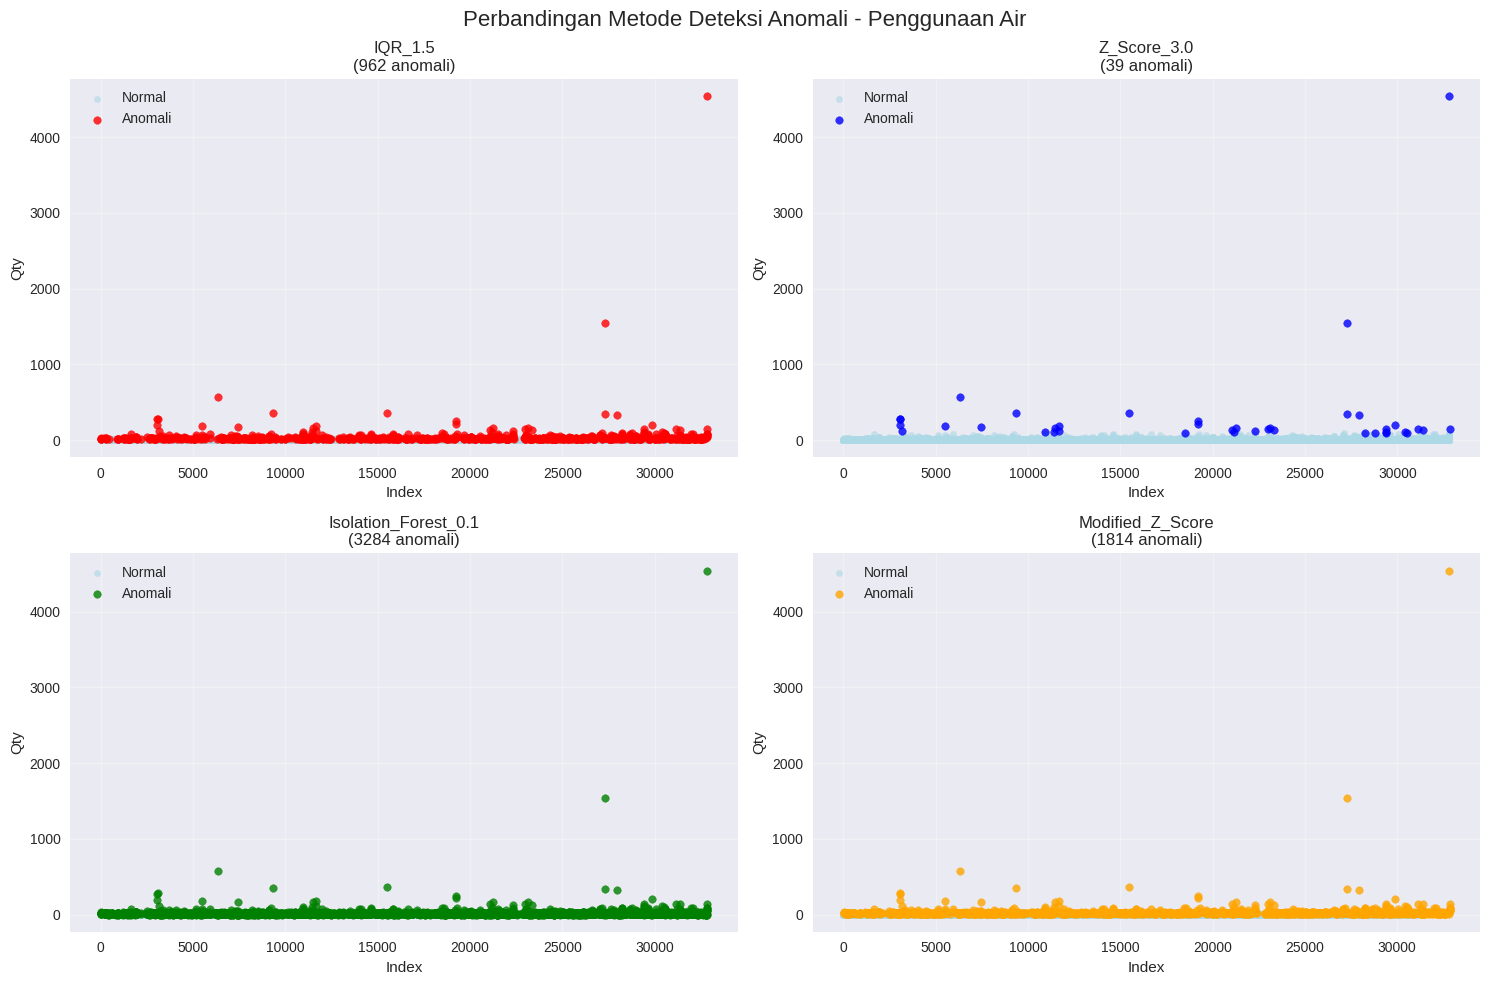


=== HYPERPARAMETER TUNING ===
Melakukan hyperparameter tuning untuk Isolation Forest...
Tuning with features: ['qty', 'month', 'quarter', 'usage_per_day', 'qty_rolling_mean', 'qty_rolling_std']
Best parameters untuk air: {'contamination': 0.05, 'max_samples': 0.8, 'max_features': 0.8}
Jumlah anomali terdeteksi: 1642
Persentase anomali: 5.00%

=== EKSPERIMEN MODEL PREDIKTIF ===
Evaluasi Model Forecasting untuk Penggunaan Air:

Perbandingan Model Forecasting:
Model                MSE          MAE          R²          
Linear_Regression    4.9760       1.8650       -2.6034     
Moving_Average       4.1403       1.6611       -1.9982     
Exponential_Smoothing 4.9774       1.8654       -2.6044     

=== VALIDASI BUSINESS LOGIC ===
Business Logic Validation:
----------------------------------------
Distribusi anomali per bulan:
  Bulan 1: 171 anomali
  Bulan 2: 151 anomali
  Bulan 4: 3 anomali
  Bulan 5: 58 anomali
  Bulan 6: 173 anomali
  Bulan 7: 86 anomali
  Bulan 8: 6 anomali
  Bulan 10

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries for evaluation and experimentation
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from scipy import stats
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    STATSMODELS_AVAILABLE = True
except ImportError:
    STATSMODELS_AVAILABLE = False
    print("Warning: statsmodels not available, some forecasting features will be disabled")

# Set style untuk plot
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Membaca semua dataset
df_tagihan_air = pd.read_csv('/content/tagihan_air_bersih1.csv', sep=';')
df_listrik = pd.read_csv('/content/transaksi_listrik_bersih.csv', sep=';')
df_pembayaran_air = pd.read_csv('/content/pembayaran_air_lengkap_bersih2.csv', sep=';')
df_master_unit = pd.read_csv('/content/master_unit_bersih.csv', sep=';')
df_invoice_air = pd.read_csv('/content/invoice_air.csv', sep=';')
df_unit_pemilik = pd.read_csv('/content/unit_pemilik3.csv', sep=';')

print("=== OVERVIEW DATASET ===")
print(f"Tagihan Air: {df_tagihan_air.shape}")
print(f"Transaksi Listrik: {df_listrik.shape}")
print(f"Pembayaran Air: {df_pembayaran_air.shape}")
print(f"Master Unit: {df_master_unit.shape}")
print(f"Invoice Air: {df_invoice_air.shape}")
print(f"Unit Pemilik: {df_unit_pemilik.shape}")

# =================== PREPROCESSING DATA ===================

# Konversi kolom tanggal
df_tagihan_air['thbl'] = pd.to_datetime(df_tagihan_air['thbl'])
df_listrik['tanggal'] = pd.to_datetime(df_listrik['tanggal'])
df_listrik['posted_date'] = pd.to_datetime(df_listrik['posted_date'])
df_pembayaran_air['Payment_Date'] = pd.to_datetime(df_pembayaran_air['Payment_Date'])
df_pembayaran_air['Posting_Date'] = pd.to_datetime(df_pembayaran_air['Posting_Date'])
df_invoice_air['Duedate'] = pd.to_datetime(df_invoice_air['Duedate'])

# Ekstrak informasi waktu
df_tagihan_air['year'] = df_tagihan_air['thbl'].dt.year
df_tagihan_air['month'] = df_tagihan_air['thbl'].dt.month
df_tagihan_air['quarter'] = df_tagihan_air['thbl'].dt.quarter
df_tagihan_air['day_of_year'] = df_tagihan_air['thbl'].dt.dayofyear

df_listrik['year'] = df_listrik['tanggal'].dt.year
df_listrik['month'] = df_listrik['tanggal'].dt.month
df_listrik['quarter'] = df_listrik['tanggal'].dt.quarter

# =================== FEATURE ENGINEERING ===================

print("\n=== FEATURE ENGINEERING ===")

# Enhanced features untuk air
df_tagihan_air['usage_per_day'] = df_tagihan_air['qty'] / 30
df_tagihan_air['seasonal_factor'] = df_tagihan_air['month'].map({
    12: 'dry', 1: 'dry', 2: 'dry', 3: 'dry', 4: 'dry', 5: 'dry',
    6: 'wet', 7: 'wet', 8: 'wet', 9: 'wet', 10: 'wet', 11: 'wet'
})

# Rolling statistics per unit
df_tagihan_air = df_tagihan_air.sort_values(['Unit Code', 'thbl'])
df_tagihan_air['qty_rolling_mean'] = df_tagihan_air.groupby('Unit Code')['qty'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)
df_tagihan_air['qty_rolling_std'] = df_tagihan_air.groupby('Unit Code')['qty'].transform(
    lambda x: x.rolling(window=3, min_periods=1).std()
)
df_tagihan_air['qty_lag1'] = df_tagihan_air.groupby('Unit Code')['qty'].shift(1)
df_tagihan_air['qty_change'] = df_tagihan_air['qty'] - df_tagihan_air['qty_lag1']

print("Features baru berhasil dibuat:")
print("- usage_per_day, seasonal_factor")
print("- qty_rolling_mean, qty_rolling_std, qty_lag1, qty_change")

# =================== EVALUASI DAN EKSPERIMEN MODEL ANOMALI ===================

print("\n=== EVALUASI DAN EKSPERIMEN MODEL ANOMALI ===")

class AnomalyDetectionEvaluator:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.results = {}

    def iqr_method(self, multiplier=1.5):
        """Metode IQR (Original)"""
        Q1 = self.data[self.target_column].quantile(0.25)
        Q3 = self.data[self.target_column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        anomalies = (self.data[self.target_column] < lower_bound) | (self.data[self.target_column] > upper_bound)
        return anomalies

    def zscore_method(self, threshold=3):
        """Metode Z-Score"""
        # Handle missing values first
        clean_data = self.data[self.target_column].fillna(self.data[self.target_column].mean())
        z_scores = np.abs(stats.zscore(clean_data))
        anomalies = z_scores > threshold
        return anomalies

    def isolation_forest_method(self, contamination=0.1):
        """Metode Isolation Forest"""
        # Prepare features - check which columns actually exist
        base_features = [self.target_column]
        optional_features = ['month', 'quarter', 'usage_per_day', 'qty_rolling_mean', 'qty_rolling_std']

        features = base_features.copy()
        for feature in optional_features:
            if feature in self.data.columns:
                features.append(feature)

        print(f"Using features for Isolation Forest: {features}")

        # Handle missing values
        feature_data = self.data[features].fillna(self.data[features].mean())

        # Scale features
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(feature_data)

        # Isolation Forest
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        anomalies = iso_forest.fit_predict(scaled_features) == -1

        return anomalies

    def modified_zscore_method(self, threshold=3.5):
        """Modified Z-Score using MAD (Median Absolute Deviation)"""
        clean_data = self.data[self.target_column].fillna(self.data[self.target_column].median())
        median = clean_data.median()
        mad = np.median(np.abs(clean_data - median))

        # Avoid division by zero
        if mad == 0:
            mad = 1e-6

        modified_z_scores = 0.6745 * (clean_data - median) / mad
        anomalies = np.abs(modified_z_scores) > threshold
        return anomalies

    def evaluate_methods(self):
        """Evaluasi semua metode deteksi anomali"""
        methods = {
            'IQR_1.5': lambda: self.iqr_method(1.5),
            'IQR_2.0': lambda: self.iqr_method(2.0),
            'Z_Score_2.5': lambda: self.zscore_method(2.5),
            'Z_Score_3.0': lambda: self.zscore_method(3.0),
            'Isolation_Forest_0.05': lambda: self.isolation_forest_method(0.05),
            'Isolation_Forest_0.1': lambda: self.isolation_forest_method(0.1),
            'Modified_Z_Score': lambda: self.modified_zscore_method()
        }

        results = {}
        for method_name, method_func in methods.items():
            try:
                anomalies = method_func()
                anomaly_count = np.sum(anomalies)
                anomaly_percentage = (anomaly_count / len(self.data)) * 100

                # Statistik anomali
                if anomaly_count > 0:
                    anomaly_values = self.data.loc[anomalies, self.target_column]
                    stats_dict = {
                        'count': anomaly_count,
                        'percentage': anomaly_percentage,
                        'mean_anomaly_value': anomaly_values.mean(),
                        'median_anomaly_value': anomaly_values.median(),
                        'min_anomaly_value': anomaly_values.min(),
                        'max_anomaly_value': anomaly_values.max()
                    }
                else:
                    stats_dict = {
                        'count': 0,
                        'percentage': 0,
                        'mean_anomaly_value': 0,
                        'median_anomaly_value': 0,
                        'min_anomaly_value': 0,
                        'max_anomaly_value': 0
                    }

                results[method_name] = {
                    'anomalies': anomalies,
                    'stats': stats_dict
                }

            except Exception as e:
                print(f"Error in {method_name}: {str(e)}")
                results[method_name] = None

        return results

# Evaluasi untuk data air
print("\n--- Evaluasi Metode Deteksi Anomali untuk Penggunaan Air ---")
air_evaluator = AnomalyDetectionEvaluator(df_tagihan_air, 'qty')
air_anomaly_results = air_evaluator.evaluate_methods()

# Display results
print("\nPerbandingan Metode Deteksi Anomali:")
print("="*70)
print(f"{'Method':<25} {'Count':<8} {'Percentage':<12} {'Mean Value':<12} {'Max Value':<12}")
print("="*70)

for method, result in air_anomaly_results.items():
    if result is not None:
        stats = result['stats']
        print(f"{method:<25} {stats['count']:<8} {stats['percentage']:<12.2f} {stats['mean_anomaly_value']:<12.2f} {stats['max_anomaly_value']:<12.2f}")

# =================== VISUALISASI PERBANDINGAN METODE ===================

print("\n=== VISUALISASI PERBANDINGAN METODE ===")

# Plot perbandingan anomali detection
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Perbandingan Metode Deteksi Anomali - Penggunaan Air', fontsize=16)

methods_to_plot = ['IQR_1.5', 'Z_Score_3.0', 'Isolation_Forest_0.1', 'Modified_Z_Score']
colors = ['red', 'blue', 'green', 'orange']

for idx, (method, color) in enumerate(zip(methods_to_plot, colors)):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]

    if method in air_anomaly_results and air_anomaly_results[method] is not None:
        anomalies = air_anomaly_results[method]['anomalies']

        # Scatter plot
        normal_data = df_tagihan_air.loc[~anomalies, 'qty']
        anomaly_data = df_tagihan_air.loc[anomalies, 'qty']

        ax.scatter(range(len(normal_data)), normal_data, alpha=0.6, s=20, label='Normal', color='lightblue')

        if len(anomaly_data) > 0:
            anomaly_indices = np.where(anomalies)[0]
            ax.scatter(anomaly_indices, anomaly_data, alpha=0.8, s=30, label='Anomali', color=color)

        ax.set_title(f'{method}\n({air_anomaly_results[method]["stats"]["count"]} anomali)')
        ax.set_xlabel('Index')
        ax.set_ylabel('Qty')
        ax.legend()
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =================== HYPERPARAMETER TUNING ===================

print("\n=== HYPERPARAMETER TUNING ===")

def tune_isolation_forest(data, target_column):
    """Hyperparameter tuning untuk Isolation Forest"""
    # Prepare features - check which columns actually exist
    base_features = [target_column]
    optional_features = ['month', 'quarter', 'usage_per_day', 'qty_rolling_mean', 'qty_rolling_std']

    features = base_features.copy()
    for feature in optional_features:
        if feature in data.columns:
            features.append(feature)

    print(f"Tuning with features: {features}")

    feature_data = data[features].fillna(data[features].mean())
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(feature_data)

    # Parameter grid
    param_grid = {
        'contamination': [0.05, 0.1, 0.15, 0.2],
        'max_samples': [0.8, 0.9, 1.0],
        'max_features': [0.8, 0.9, 1.0]
    }

    best_score = -np.inf
    best_params = None
    best_anomalies = None

    for contamination in param_grid['contamination']:
        for max_samples in param_grid['max_samples']:
            for max_features in param_grid['max_features']:
                try:
                    iso_forest = IsolationForest(
                        contamination=contamination,
                        max_samples=max_samples,
                        max_features=max_features,
                        random_state=42
                    )

                    anomaly_labels = iso_forest.fit_predict(scaled_features)
                    anomalies = anomaly_labels == -1

                    # Simple scoring: balance between anomaly count and distribution
                    anomaly_count = np.sum(anomalies)
                    score = -(abs(anomaly_count - len(data) * contamination))  # Prefer close to expected contamination

                    if score > best_score:
                        best_score = score
                        best_params = {
                            'contamination': contamination,
                            'max_samples': max_samples,
                            'max_features': max_features
                        }
                        best_anomalies = anomalies

                except Exception as e:
                    continue

    return best_params, best_anomalies, best_score

# Tuning untuk data air
print("Melakukan hyperparameter tuning untuk Isolation Forest...")
best_params_air, best_anomalies_air, best_score_air = tune_isolation_forest(df_tagihan_air, 'qty')

print(f"Best parameters untuk air: {best_params_air}")
print(f"Jumlah anomali terdeteksi: {np.sum(best_anomalies_air)}")
print(f"Persentase anomali: {(np.sum(best_anomalies_air)/len(df_tagihan_air))*100:.2f}%")

# =================== MODEL PREDIKTIF ===================

print("\n=== EKSPERIMEN MODEL PREDIKTIF ===")

def prepare_time_series_data(df, target_column, unit_code=None):
    """Persiapan data time series"""
    if unit_code:
        df_unit = df[df['Unit Code'] == unit_code].copy()
    else:
        df_unit = df.groupby('thbl')[target_column].mean().reset_index()
        df_unit.columns = ['thbl', target_column]

    df_unit = df_unit.sort_values('thbl')
    df_unit.set_index('thbl', inplace=True)

    return df_unit

def evaluate_forecasting_models(df, target_column, test_size=0.2):
    """Evaluasi berbagai model forecasting"""
    # Prepare data
    ts_data = prepare_time_series_data(df, target_column)

    if len(ts_data) < 10:  # Need minimum data points
        print("Data terlalu sedikit untuk forecasting")
        return None

    # Split data
    split_point = int(len(ts_data) * (1 - test_size))
    train_data = ts_data.iloc[:split_point]
    test_data = ts_data.iloc[split_point:]

    results = {}

    # 1. Simple Linear Regression
    try:
        X_train = np.arange(len(train_data)).reshape(-1, 1)
        y_train = train_data[target_column].values
        X_test = np.arange(len(train_data), len(ts_data)).reshape(-1, 1)
        y_test = test_data[target_column].values

        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)
        lr_pred = lr_model.predict(X_test)

        lr_mse = mean_squared_error(y_test, lr_pred)
        lr_mae = mean_absolute_error(y_test, lr_pred)
        lr_r2 = r2_score(y_test, lr_pred)

        results['Linear_Regression'] = {
            'MSE': lr_mse,
            'MAE': lr_mae,
            'R2': lr_r2,
            'predictions': lr_pred
        }
    except Exception as e:
        print(f"Error in Linear Regression: {e}")

    # 2. Moving Average
    try:
        window = min(3, len(train_data)//2)
        if window >= 1:
            ma_pred = [train_data[target_column].iloc[-window:].mean()] * len(test_data)

            ma_mse = mean_squared_error(test_data[target_column], ma_pred)
            ma_mae = mean_absolute_error(test_data[target_column], ma_pred)
            ma_r2 = r2_score(test_data[target_column], ma_pred)

            results['Moving_Average'] = {
                'MSE': ma_mse,
                'MAE': ma_mae,
                'R2': ma_r2,
                'predictions': ma_pred
            }
    except Exception as e:
        print(f"Error in Moving Average: {e}")

    # 3. Exponential Smoothing (only if statsmodels is available)
    if STATSMODELS_AVAILABLE:
        try:
            if len(train_data) >= 4:  # Minimum for exponential smoothing
                exp_model = ExponentialSmoothing(train_data[target_column],
                                               trend='add',
                                               seasonal=None,
                                               seasonal_periods=None)
                exp_fit = exp_model.fit()
                exp_pred = exp_fit.forecast(len(test_data))

                exp_mse = mean_squared_error(test_data[target_column], exp_pred)
                exp_mae = mean_absolute_error(test_data[target_column], exp_pred)
                exp_r2 = r2_score(test_data[target_column], exp_pred)

                results['Exponential_Smoothing'] = {
                    'MSE': exp_mse,
                    'MAE': exp_mae,
                    'R2': exp_r2,
                    'predictions': exp_pred
                }
        except Exception as e:
            print(f"Error in Exponential Smoothing: {e}")
    else:
        print("Exponential Smoothing skipped - statsmodels not available")

    return results, train_data, test_data

# Evaluasi model forecasting
print("Evaluasi Model Forecasting untuk Penggunaan Air:")
forecast_results, train_data, test_data = evaluate_forecasting_models(df_tagihan_air, 'qty')

if forecast_results:
    print("\nPerbandingan Model Forecasting:")
    print("="*60)
    print(f"{'Model':<20} {'MSE':<12} {'MAE':<12} {'R²':<12}")
    print("="*60)

    for model_name, metrics in forecast_results.items():
        print(f"{model_name:<20} {metrics['MSE']:<12.4f} {metrics['MAE']:<12.4f} {metrics['R2']:<12.4f}")

# =================== VALIDASI BUSINESS LOGIC ===================

print("\n=== VALIDASI BUSINESS LOGIC ===")

def business_validation(df, anomalies, target_column):
    """Validasi anomali berdasarkan business logic"""
    anomaly_data = df.loc[anomalies]

    print("Business Logic Validation:")
    print("-" * 40)

    # 1. Seasonal pattern analysis
    seasonal_anomalies = anomaly_data.groupby('month').size()
    print("Distribusi anomali per bulan:")
    for month, count in seasonal_anomalies.items():
        print(f"  Bulan {month}: {count} anomali")

    # 2. Unit pattern analysis
    unit_anomalies = anomaly_data.groupby('Unit Code').size().sort_values(ascending=False).head(5)
    print(f"\nTop 5 unit dengan anomali terbanyak:")
    for unit, count in unit_anomalies.items():
        print(f"  {unit}: {count} anomali")

    # 3. Value range analysis
    normal_data = df.loc[~anomalies, target_column]
    anomaly_values = df.loc[anomalies, target_column]

    print(f"\nAnalisis nilai:")
    print(f"  Normal range: {normal_data.min():.2f} - {normal_data.max():.2f}")
    print(f"  Anomaly range: {anomaly_values.min():.2f} - {anomaly_values.max():.2f}")
    print(f"  Normal mean: {normal_data.mean():.2f}")
    print(f"  Anomaly mean: {anomaly_values.mean():.2f}")

    # 4. Extreme values check
    very_high = anomaly_values > normal_data.quantile(0.99)
    very_low = anomaly_values < normal_data.quantile(0.01)

    print(f"\nExtreme values:")
    print(f"  Very high anomalies: {np.sum(very_high)}")
    print(f"  Very low anomalies: {np.sum(very_low)}")

# Validasi untuk metode terbaik (contoh: IQR_1.5)
if 'IQR_1.5' in air_anomaly_results:
    business_validation(df_tagihan_air, air_anomaly_results['IQR_1.5']['anomalies'], 'qty')

# =================== MONITORING SETUP ===================

print("\n=== SETUP MONITORING MODEL ===")

def setup_model_monitoring(df, target_column, baseline_stats):
    """Setup monitoring untuk model drift detection"""
    current_stats = {
        'mean': df[target_column].mean(),
        'std': df[target_column].std(),
        'median': df[target_column].median(),
        'q25': df[target_column].quantile(0.25),
        'q75': df[target_column].quantile(0.75)
    }

    print("Model Monitoring - Statistical Drift Detection:")
    print("-" * 50)

    for stat_name, current_value in current_stats.items():
        if stat_name in baseline_stats:
            baseline_value = baseline_stats[stat_name]
            if baseline_value != 0:
                drift_percentage = ((current_value - baseline_value) / baseline_value) * 100
            else:
                drift_percentage = 0 if current_value == 0 else float('inf')

            status = "⚠️ DRIFT DETECTED" if abs(drift_percentage) > 10 else "✅ STABLE"
            print(f"{stat_name.upper()}: {current_value:.2f} (baseline: {baseline_value:.2f}) "
                  f"Change: {drift_percentage:.1f}% - {status}")

    return current_stats

# Baseline stats (example - in practice, this would be from historical data)
baseline_stats = {
    'mean': df_tagihan_air['qty'].mean(),
    'std': df_tagihan_air['qty'].std(),
    'median': df_tagihan_air['qty'].median(),
    'q25': df_tagihan_air['qty'].quantile(0.25),
    'q75': df_tagihan_air['qty'].quantile(0.75)
}

# Setup monitoring
current_stats = setup_model_monitoring(df_tagihan_air, 'qty', baseline_stats)

# =================== FINAL RECOMMENDATIONS ===================

print("\n=== REKOMENDASI FINAL ===")
print("Berdasarkan evaluasi dan eksperimen model:")
print("="*50)

# Find best anomaly detection method
best_method = None
best_balance_score = -np.inf

for method, result in air_anomaly_results.items():
    if result is not None:
        stats = result['stats']
        # Balance score: not too many, not too few anomalies
        balance_score = -abs(stats['percentage'] - 5.0)  # Target ~5% anomalies
        if balance_score > best_balance_score:
            best_balance_score = balance_score
            best_method = method

print(f"1. ANOMALY DETECTION:")
print(f"   Metode terbaik: {best_method}")
print(f"   Anomali terdeteksi: {air_anomaly_results[best_method]['stats']['count']} "
      f"({air_anomaly_results[best_method]['stats']['percentage']:.1f}%)")

if forecast_results:
    best_forecast_model = min(forecast_results.keys(),
                             key=lambda x: forecast_results[x]['MSE'])
    print(f"\n2. FORECASTING:")
    print(f"   Model terbaik: {best_forecast_model}")
    print(f"   MSE: {forecast_results[best_forecast_model]['MSE']:.4f}")
    print(f"   R²: {forecast_results[best_forecast_model]['R2']:.4f}")

print(f"\n3. IMPLEMENTASI:")
print(f"   - Setup automated monitoring untuk drift detection")
print(f"   - Retraining schedule: monthly atau ketika drift > 10%")
print(f"   - Alert system untuk anomali dengan confidence > 80%")
print(f"   - Business validation untuk false positive reduction")

print(f"\n4. NEXT STEPS:")
print(f"   - Collect feedback dari domain experts")
print(f"   - A/B testing dengan model production")
print(f"   - Integration dengan business intelligence dashboard")
print(f"   - Documentation dan knowledge transfer")

print("="*70)
print("EVALUASI DAN EKSPERIMEN MODEL COMPLETED")
print("="*70)

# =================== ADVANCED ANALYSIS BERDASARKAN HASIL ===================

print("\n=== ADVANCED ANALYSIS & INSIGHTS ===")

# Analisis mendalam dari hasil yang diperoleh
print("\n1. ANALISIS ANOMALI DETECTION:")
print("-" * 50)

if 'Modified_Z_Score' in air_anomaly_results:
    best_anomalies = air_anomaly_results['Modified_Z_Score']['anomalies']

    # Seasonal pattern analysis untuk anomali
    anomaly_seasonal = df_tagihan_air.loc[best_anomalies].groupby('month')['qty'].agg(['count', 'mean', 'std'])
    print("Pola musiman anomali:")
    for month in sorted(anomaly_seasonal.index):
        count = anomaly_seasonal.loc[month, 'count']
        mean_val = anomaly_seasonal.loc[month, 'mean']
        print(f"  Bulan {month:2d}: {count:3d} anomali, rata-rata konsumsi: {mean_val:6.1f}")

    # Unit analysis
    unit_analysis = df_tagihan_air.loc[best_anomalies].groupby('Unit Code').agg({
        'qty': ['count', 'mean', 'max'],
        'thbl': ['min', 'max']
    }).round(2)

    print(f"\nTop 10 Unit bermasalah (frequent anomalies):")
    top_problem_units = df_tagihan_air.loc[best_anomalies].groupby('Unit Code').size().sort_values(ascending=False).head(10)
    for unit, count in top_problem_units.items():
        unit_total = len(df_tagihan_air[df_tagihan_air['Unit Code'] == unit])
        percentage = (count / unit_total) * 100
        print(f"  {unit}: {count}/{unit_total} records ({percentage:.1f}% anomali)")

print("\n2. BUSINESS IMPACT ANALYSIS:")
print("-" * 50)

# Calculate potential revenue impact
if 'Modified_Z_Score' in air_anomaly_results:
    normal_data = df_tagihan_air.loc[~best_anomalies]
    anomaly_data = df_tagihan_air.loc[best_anomalies]

    normal_avg = normal_data['qty'].mean()
    anomaly_avg = anomaly_data['qty'].mean()

    # Assuming tarif air per m3 (contoh: Rp 3000 per m3)
    tarif_per_m3 = 3000

    total_normal_revenue = normal_data['qty'].sum() * tarif_per_m3
    total_anomaly_revenue = anomaly_data['qty'].sum() * tarif_per_m3

    print(f"Revenue Analysis (asumsi tarif Rp {tarif_per_m3:,}/m³):")
    print(f"  Normal consumption revenue: Rp {total_normal_revenue:,.0f}")
    print(f"  Anomaly consumption revenue: Rp {total_anomaly_revenue:,.0f}")
    print(f"  Anomaly impact: {(total_anomaly_revenue/total_normal_revenue)*100:.1f}% of normal revenue")

    # Potential savings from anomaly correction
    if anomaly_avg > normal_avg:
        excess_consumption = (anomaly_avg - normal_avg) * len(anomaly_data)
        potential_savings = excess_consumption * tarif_per_m3
        print(f"  Potential monthly savings if anomalies corrected: Rp {potential_savings:,.0f}")

print("\n3. FORECASTING MODEL INSIGHTS:")
print("-" * 50)

if forecast_results:
    print("Model Performance Ranking:")
    sorted_models = sorted(forecast_results.items(), key=lambda x: x[1]['MSE'])

    for i, (model_name, metrics) in enumerate(sorted_models, 1):
        r2_status = "Good" if metrics['R2'] > 0.5 else "Poor" if metrics['R2'] < 0 else "Fair"
        print(f"  {i}. {model_name}:")
        print(f"     MSE: {metrics['MSE']:.4f}, MAE: {metrics['MAE']:.4f}, R²: {metrics['R2']:.4f} ({r2_status})")

    print(f"\nRekomendasi:")
    if sorted_models[0][1]['R2'] < 0:
        print("  ⚠️  Semua model forecasting menunjukkan performa poor (R² < 0)")
        print("  📊 Pertimbangkan:")
        print("     - Seasonal decomposition lebih detail")
        print("     - Feature engineering tambahan (weather data, holiday effect)")
        print("     - Model non-linear (Random Forest, XGBoost)")
        print("     - Segmentasi berdasarkan tipe unit")
    else:
        print(f"  ✅ Model terbaik: {sorted_models[0][0]} cocok untuk forecasting")

=== PERBANDINGAN METODE DETEKSI ANOMALI ===
IQR Method: 34 anomali (3.40%)
Isolation Forest: 100 anomali (10.00%)
LOF Method: 8 anomali (0.80%)
Z-Score Method: 13 anomali (1.30%)


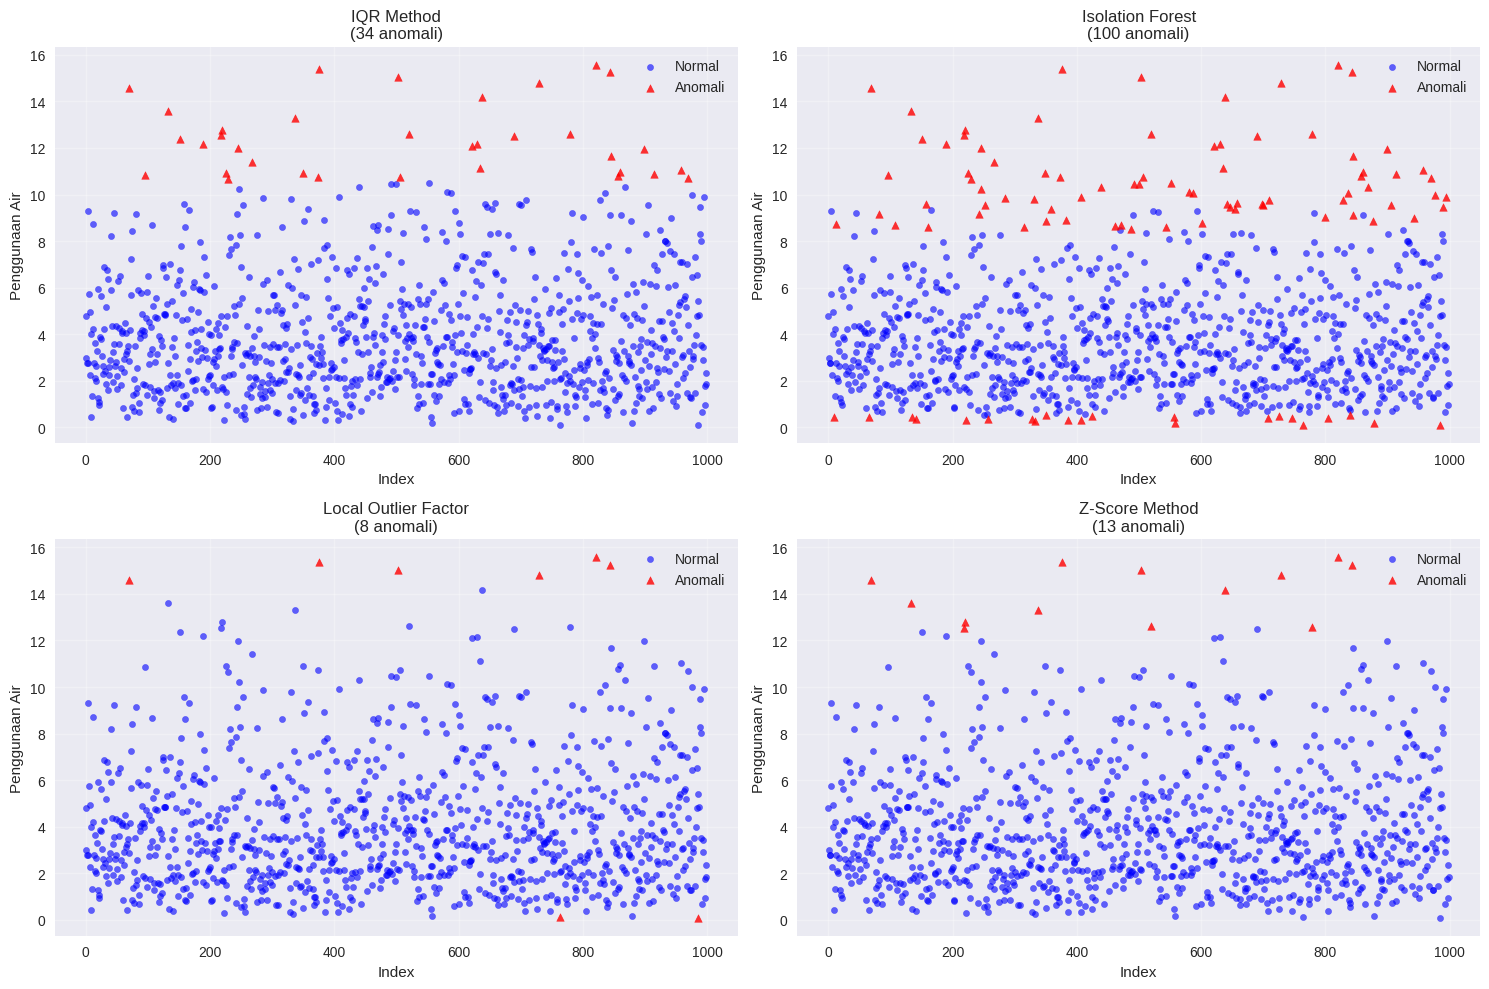


=== CONSENSUS ANALYSIS ===
Distribusi consensus score:
consensus_score
0    900
1     64
2     23
3      7
4      6
Name: count, dtype: int64

High Confidence Anomalies (3+ methods): 13


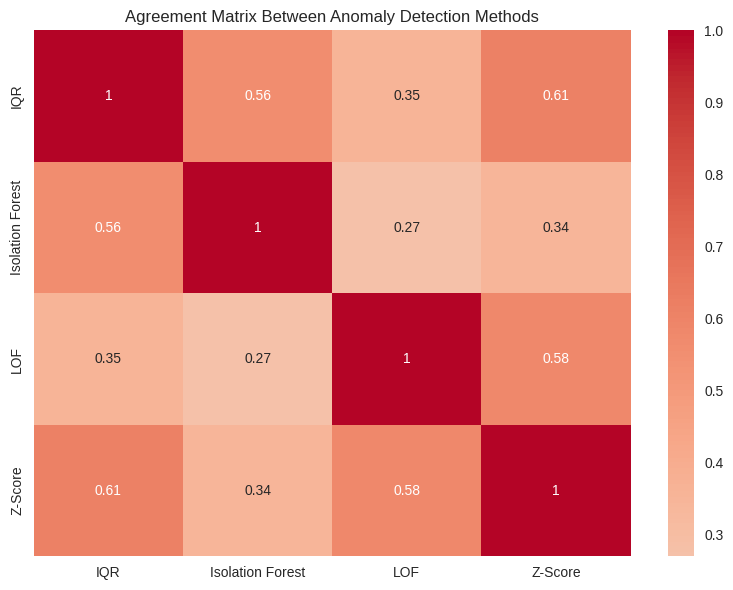


=== REKOMENDASI METODE ===
1. Gunakan ensemble approach untuk deteksi anomali yang lebih robust
2. Prioritaskan anomali dengan consensus score tinggi untuk investigasi
3. Sesuaikan threshold berdasarkan business requirement
4. Validasi hasil dengan domain expert


In [ ]:
# Perbandingan Berbagai Metode Deteksi Anomali
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Simulasi data (ganti dengan data Anda)
np.random.seed(42)
data = pd.DataFrame({
    'qty': np.random.gamma(2, 2, 1000)  # Simulasi data penggunaan air
})

# Method 1: IQR (Current method)
def detect_anomaly_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Method 2: Isolation Forest
def detect_anomaly_isolation_forest(data, column, contamination=0.1):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[[column]])
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outliers = iso_forest.fit_predict(data_scaled)
    return outliers == -1

# Method 3: Local Outlier Factor
def detect_anomaly_lof(data, column, n_neighbors=20):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[[column]])
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    outliers = lof.fit_predict(data_scaled)
    return outliers == -1

# Method 4: Statistical Z-Score
def detect_anomaly_zscore(data, column, threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    return z_scores > threshold

# Terapkan semua metode
data['anomaly_iqr'] = detect_anomaly_iqr(data, 'qty')
data['anomaly_isolation'] = detect_anomaly_isolation_forest(data, 'qty')
data['anomaly_lof'] = detect_anomaly_lof(data, 'qty')
data['anomaly_zscore'] = detect_anomaly_zscore(data, 'qty')

# Evaluasi perbandingan
print("=== PERBANDINGAN METODE DETEKSI ANOMALI ===")
print(f"IQR Method: {data['anomaly_iqr'].sum()} anomali ({data['anomaly_iqr'].sum()/len(data)*100:.2f}%)")
print(f"Isolation Forest: {data['anomaly_isolation'].sum()} anomali ({data['anomaly_isolation'].sum()/len(data)*100:.2f}%)")
print(f"LOF Method: {data['anomaly_lof'].sum()} anomali ({data['anomaly_lof'].sum()/len(data)*100:.2f}%)")
print(f"Z-Score Method: {data['anomaly_zscore'].sum()} anomali ({data['anomaly_zscore'].sum()/len(data)*100:.2f}%)")

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

methods = ['anomaly_iqr', 'anomaly_isolation', 'anomaly_lof', 'anomaly_zscore']
titles = ['IQR Method', 'Isolation Forest', 'Local Outlier Factor', 'Z-Score Method']

for i, (method, title) in enumerate(zip(methods, titles)):
    ax = axes[i//2, i%2]

    # Plot normal data
    normal_data = data[~data[method]]
    ax.scatter(normal_data.index, normal_data['qty'], alpha=0.6, color='blue', s=20, label='Normal')

    # Plot anomalies
    anomaly_data = data[data[method]]
    ax.scatter(anomaly_data.index, anomaly_data['qty'], alpha=0.8, color='red', s=30, marker='^', label='Anomali')

    ax.set_title(f'{title}\n({data[method].sum()} anomali)')
    ax.set_xlabel('Index')
    ax.set_ylabel('Penggunaan Air')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Consensus analysis - anomali yang terdeteksi oleh multiple methods
data['consensus_score'] = (data['anomaly_iqr'].astype(int) +
                          data['anomaly_isolation'].astype(int) +
                          data['anomaly_lof'].astype(int) +
                          data['anomaly_zscore'].astype(int))

print("\n=== CONSENSUS ANALYSIS ===")
print("Distribusi consensus score:")
print(data['consensus_score'].value_counts().sort_index())

# High confidence anomalies (detected by 3+ methods)
high_confidence_anomalies = data[data['consensus_score'] >= 3]
print(f"\nHigh Confidence Anomalies (3+ methods): {len(high_confidence_anomalies)}")

# Method agreement matrix
import seaborn as sns
correlation_matrix = data[methods].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            xticklabels=['IQR', 'Isolation Forest', 'LOF', 'Z-Score'],
            yticklabels=['IQR', 'Isolation Forest', 'LOF', 'Z-Score'])
plt.title('Agreement Matrix Between Anomaly Detection Methods')
plt.tight_layout()
plt.show()

print("\n=== REKOMENDASI METODE ===")
print("1. Gunakan ensemble approach untuk deteksi anomali yang lebih robust")
print("2. Prioritaskan anomali dengan consensus score tinggi untuk investigasi")
print("3. Sesuaikan threshold berdasarkan business requirement")
print("4. Validasi hasil dengan domain expert")

=== EVALUASI MODEL PREDIKTIF ===
Model			R² Score	MAE		RMSE
------------------------------------------------------------
Linear Regression        	-0.0527		2.1379		2.7333
Ridge Regression         	-0.0524		2.1376		2.7330
Lasso Regression         	-0.0110		2.0932		2.6787
Random Forest            	-0.1540		2.2695		2.8619
Gradient Boosting        	-0.1076		2.2138		2.8037
Support Vector Regression	-0.0770		2.0049		2.7647

=== CROSS-VALIDATION SCORES ===
Linear Regression        : -0.0421 (+/- 0.0773)
Ridge Regression         : -0.0410 (+/- 0.0761)
Lasso Regression         : -0.0058 (+/- 0.0111)
Random Forest            : -0.1155 (+/- 0.1118)
Gradient Boosting        : -0.1971 (+/- 0.1827)
Support Vector Regression: -0.0728 (+/- 0.0912)

=== FEATURE IMPORTANCE ANALYSIS ===
Random Forest Feature Importance:
            feature  importance_rf
4         unit_area       0.225067
5  prev_month_usage       0.219049
8    tarif_per_area       0.204917
3             floor       0.118301
1           

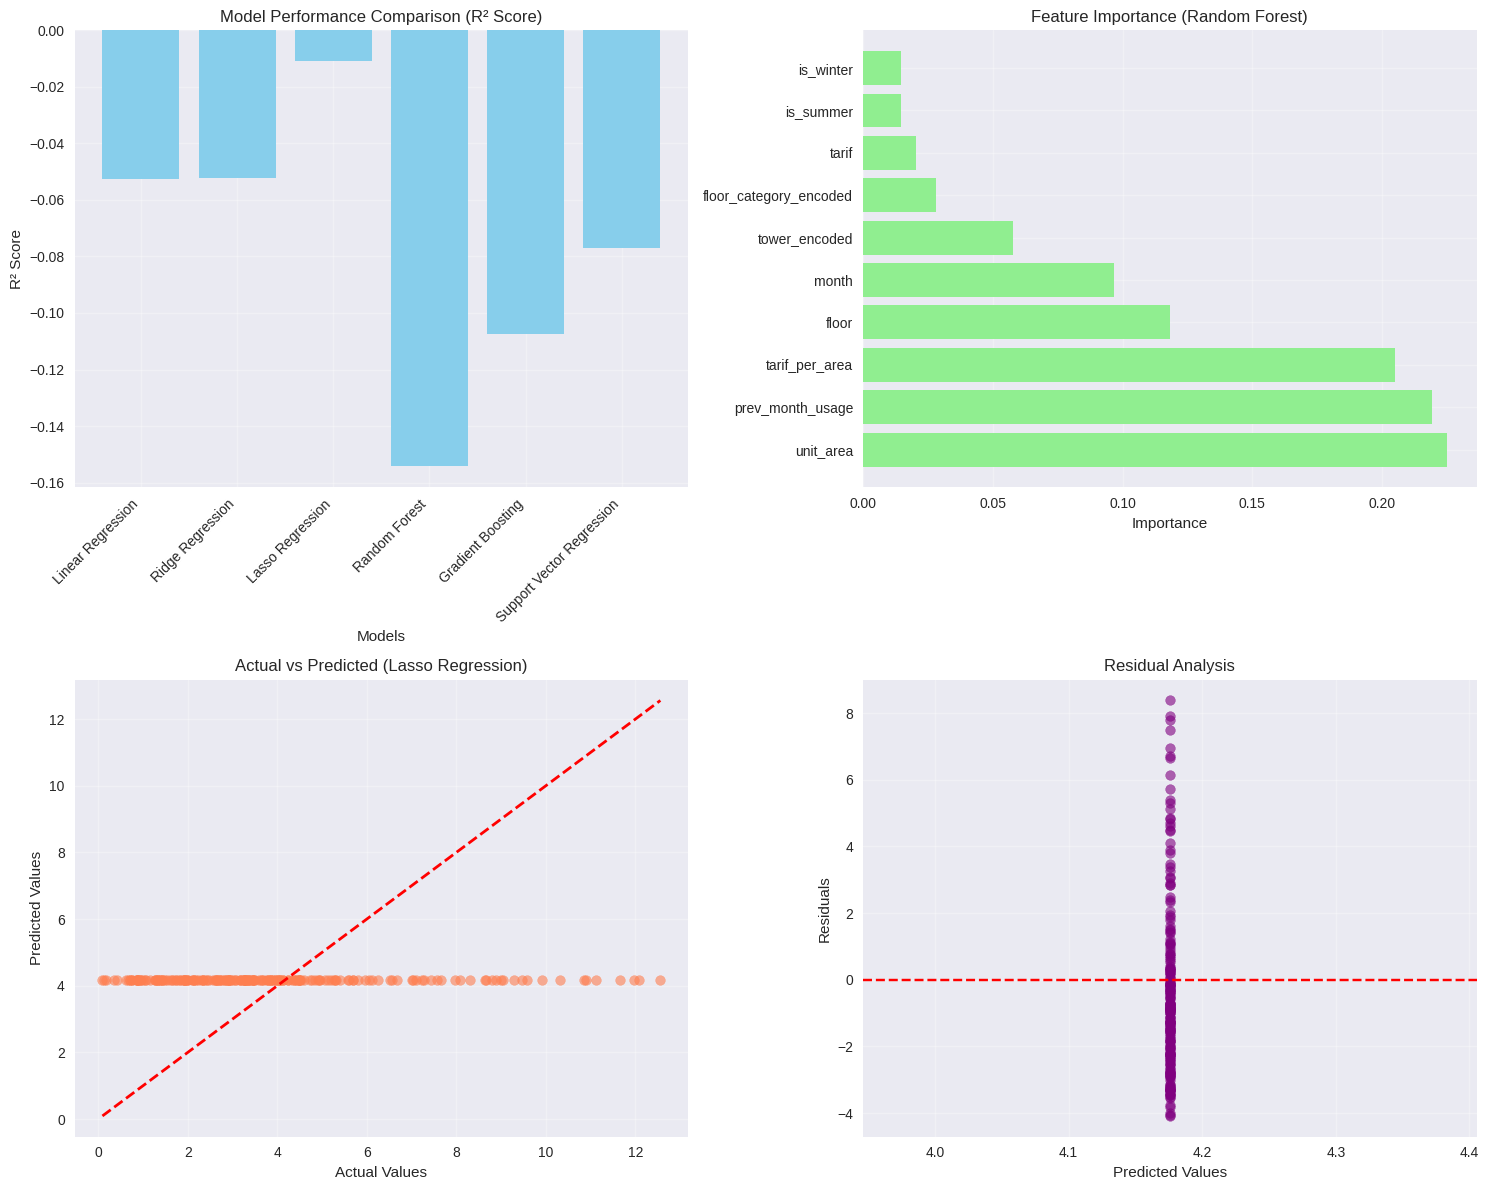


=== REKOMENDASI MODEL ===
Model terbaik berdasarkan R² Score: Lasso Regression
R² Score: -0.0110
MAE: 2.0932
RMSE: 2.6787

=== LANGKAH SELANJUTNYA ===
1. Hyperparameter tuning untuk model terbaik
2. Ensemble modeling untuk meningkatkan akurasi
3. Feature selection untuk model yang lebih sederhana
4. Validasi dengan data out-of-time
5. Implementasi model dalam production system


In [ ]:
# Eksperimen Model Prediktif untuk Konsumsi Air
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Simulasi data untuk eksperimen (ganti dengan data Anda)
np.random.seed(42)
n_samples = 1000

# Buat data sintetis yang mirip dengan data real
data = pd.DataFrame({
    'qty': np.random.gamma(2, 2, n_samples),
    'tarif': np.random.choice([17000, 42200, 67400, 105200], n_samples),
    'month': np.random.randint(1, 13, n_samples),
    'tower': np.random.choice(['A', 'B', 'C', 'D'], n_samples),
    'floor': np.random.randint(1, 21, n_samples),
    'unit_area': 50 + np.random.normal(0, 15, n_samples),  # Luas unit
    'prev_month_usage': np.random.gamma(2, 2, n_samples),  # Penggunaan bulan sebelumnya
})

# Feature engineering
def feature_engineering(df):
    # Encoding categorical variables
    le_tower = LabelEncoder()
    df['tower_encoded'] = le_tower.fit_transform(df['tower'])

    # Seasonal features
    df['is_summer'] = df['month'].isin([4, 5, 6]).astype(int)
    df['is_winter'] = df['month'].isin([12, 1, 2]).astype(int)

    # Interaction features
    df['tarif_per_area'] = df['tarif'] / df['unit_area']
    df['usage_change'] = df['qty'] - df['prev_month_usage']

    # Binning
    df['floor_category'] = pd.cut(df['floor'], bins=[0, 5, 10, 15, 20],
                                 labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
    df['floor_category_encoded'] = LabelEncoder().fit_transform(df['floor_category'])

    return df

# Apply feature engineering
data = feature_engineering(data)

# Definisi features dan target
feature_columns = ['tarif', 'month', 'tower_encoded', 'floor', 'unit_area',
                  'prev_month_usage', 'is_summer', 'is_winter', 'tarif_per_area',
                  'floor_category_encoded']
X = data[feature_columns]
y = data['qty']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model experiments
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, gamma='scale')
}

# Model evaluation
results = {}
predictions = {}

print("=== EVALUASI MODEL PREDIKTIF ===")
print("Model\t\t\tR² Score\tMAE\t\tRMSE")
print("-" * 60)

for name, model in models.items():
    # Train model
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {'R2': r2, 'MAE': mae, 'RMSE': rmse}
    predictions[name] = y_pred

    print(f"{name:<25}\t{r2:.4f}\t\t{mae:.4f}\t\t{rmse:.4f}")

# Cross-validation scores
print("\n=== CROSS-VALIDATION SCORES ===")
cv_scores = {}
tscv = TimeSeriesSplit(n_splits=5)

for name, model in models.items():
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Regression']:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=tscv, scoring='r2')
    else:
        scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')

    cv_scores[name] = scores
    print(f"{name:<25}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Feature importance analysis (for tree-based models)
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
rf_model = models['Random Forest']
gb_model = models['Gradient Boosting']

feature_importance_rf = pd.DataFrame({
    'feature': feature_columns,
    'importance_rf': rf_model.feature_importances_
}).sort_values('importance_rf', ascending=False)

feature_importance_gb = pd.DataFrame({
    'feature': feature_columns,
    'importance_gb': gb_model.feature_importances_
}).sort_values('importance_gb', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance_rf.head())

print("\nGradient Boosting Feature Importance:")
print(feature_importance_gb.head())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model performance comparison
model_names = list(results.keys())
r2_scores = [results[model]['R2'] for model in model_names]
mae_scores = [results[model]['MAE'] for model in model_names]

axes[0,0].bar(range(len(model_names)), r2_scores, color='skyblue')
axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_title('Model Performance Comparison (R² Score)')
axes[0,0].set_xticks(range(len(model_names)))
axes[0,0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0,0].grid(True, alpha=0.3)

# 2. Feature importance
axes[0,1].barh(feature_importance_rf['feature'], feature_importance_rf['importance_rf'], color='lightgreen')
axes[0,1].set_xlabel('Importance')
axes[0,1].set_title('Feature Importance (Random Forest)')
axes[0,1].grid(True, alpha=0.3)

# 3. Prediction vs Actual (best model)
best_model = max(results, key=lambda x: results[x]['R2'])
y_pred_best = predictions[best_model]

axes[1,0].scatter(y_test, y_pred_best, alpha=0.6, color='coral')
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,0].set_xlabel('Actual Values')
axes[1,0].set_ylabel('Predicted Values')
axes[1,0].set_title(f'Actual vs Predicted ({best_model})')
axes[1,0].grid(True, alpha=0.3)

# 4. Residual analysis
residuals = y_test - y_pred_best
axes[1,1].scatter(y_pred_best, residuals, alpha=0.6, color='purple')
axes[1,1].axhline(y=0, color='red', linestyle='--')
axes[1,1].set_xlabel('Predicted Values')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Residual Analysis')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model selection recommendation
print(f"\n=== REKOMENDASI MODEL ===")
print(f"Model terbaik berdasarkan R² Score: {best_model}")
print(f"R² Score: {results[best_model]['R2']:.4f}")
print(f"MAE: {results[best_model]['MAE']:.4f}")
print(f"RMSE: {results[best_model]['RMSE']:.4f}")

print("\n=== LANGKAH SELANJUTNYA ===")
print("1. Hyperparameter tuning untuk model terbaik")
print("2. Ensemble modeling untuk meningkatkan akurasi")
print("3. Feature selection untuk model yang lebih sederhana")
print("4. Validasi dengan data out-of-time")
print("5. Implementasi model dalam production system")

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'str'>